In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Credit Score Prediction**



# **Project Summary**

Summary of the Project Journey
1. **Data Understanding and Cleaning**: The project began with a thorough analysis of the dataset. The initial data wrangling phase was critical, involving the standardization of missing value representations (such as 'NM', 'No Data'), the correction of data types, and the removal of irrelevant or sensitive columns like SSN and Name.
2. **Feature Engineering**: To enrich the dataset, several powerful features were engineered. A Debt-to-Income Ratio was created to provide a clearer picture of a customer's financial burden. The Type_of_Loan column was transformed from a complex string into a set of binary features, making it directly usable by the model. Additionally, features like Age were binned to better capture non-linear relationships.
3. **Exploratory Data Analysis (EDA) and Hypothesis Testing**: Through a structured UBM (Univariate, Bivariate, Multivariate) approach, we uncovered key insights that were later validated with statistical tests:
* There is a statistically significant relationship between monthly income and credit score, with higher earners tending to have better scores (confirmed via ANOVA).
* A customer's credit mix is significantly associated with their credit score, highlighting the importance of a diverse credit portfolio (confirmed via Chi-Square test).
* The number of delayed payments is a powerful predictor of credit risk, with 'Poor' credit score customers having a significantly higher number of late payments than 'Good' score customers (confirmed via t-test).
4. **Model Implementation and Selection**: Three distinct models were trained and evaluated: Logistic Regression (as a baseline), Random Forest, and XGBoost. To address the inherent class imbalance in the dataset, the SMOTE technique was applied to the training data, ensuring the models did not become biased towards the majority class. After rigorous hyperparameter tuning using RandomizedSearchCV, the Tuned XGBoost Classifier was selected as the final model.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


In this project, we aim to develop a predictive model that estimates an individual's credit score based on key financial indicators such as income, credit card usage, and payment behavior. Credit scores are critical in determining a person's creditworthiness and influence decisions related to loan approvals, interest rates, and financial risk assessments. By leveraging machine learning techniques, this model seeks to provide a data-driven approach to credit scoring, enabling more efficient and transparent financial evaluations.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Importing all necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [3]:
# Loading the Dataset
pb_df = pd.read_csv('/content/drive/MyDrive/PaisaBazaar Project/dataset-2.csv')

### Dataset First View

In [4]:
# Dataset First Look
pb_df.head(10)

ID  Customer_ID  Month             Name   Age          SSN Occupation  \
0  5634         3392      1    Aaron Maashoh  23.0  821000265.0  Scientist   
1  5635         3392      2    Aaron Maashoh  23.0  821000265.0  Scientist   
2  5636         3392      3    Aaron Maashoh  23.0  821000265.0  Scientist   
3  5637         3392      4    Aaron Maashoh  23.0  821000265.0  Scientist   
4  5638         3392      5    Aaron Maashoh  23.0  821000265.0  Scientist   
5  5639         3392      6    Aaron Maashoh  23.0  821000265.0  Scientist   
6  5640         3392      7    Aaron Maashoh  23.0  821000265.0  Scientist   
7  5641         3392      8    Aaron Maashoh  23.0  821000265.0  Scientist   
8  5646         8625      1  Rick Rothackerj  28.0    4075839.0    Teacher   
9  5647         8625      2  Rick Rothackerj  28.0    4075839.0    Teacher   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0       19114.12            1824.843333                3.0  ...        Good   
1       19114.12            1824.843333                3.0  ...        Good   
2       19114.12            1824.843333                3.0  ...        Good   
3       19114.12            1824.843333                3.0  ...        Good   
4       19114.12            1824.843333                3.0  ...        Good   
5       19114.12            1824.843333                3.0  ...        Good   
6       19114.12            1824.843333                3.0  ...        Good   
7       19114.12            1824.843333                3.0  ...        Good   
8       34847.84            3037.986667                2.0  ...        Good   
9       34847.84            3037.986667                2.0  ...        Good   

   Outstanding_Debt  Credit_Utilization_Ratio Credit_History_Age  \
0            809.98                 26.822620              265.0   
1            809.98                 31.944960              266.0   
2            809.98                 28.609352              267.0   
3            809.98                 31.377862              268.0   
4            809.98                 24.797347              269.0   
5            809.98                 27.262259              270.0   
6            809.98                 22.537593              271.0   
7            809.98                 23.933795              272.0   
8            605.03                 24.464031              319.0   
9            605.03                 38.550848              320.0   

   Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                     No            49.574949                21.465380   
1                     No            49.574949                21.465380   
2                     No            49.574949                21.465380   
3                     No            49.574949                21.465380   
4                     No            49.574949                21.465380   
5                     No            49.574949                21.465380   
6                     No            49.574949                21.465380   
7                     No            49.574949                21.465380   
8                     No            18.816215                39.684018   
9                     No            18.816215                39.684018   

                  Payment_Behaviour Monthly_Balance  Credit_Score  
0   High_spent_Small_value_payments      312.494089          Good  
1    Low_spent_Large_value_payments      284.629162          Good  
2   Low_spent_Medium_value_payments      331.209863          Good  
3    Low_spent_Small_value_payments      223.451310          Good  
4  High_spent_Medium_value_payments      341.489231          Good  
5  High_spent_Medium_value_payments      340.479212          Good  
6    Low_spent_Small_value_payments      244.565317          Good  
7  High_spent_Medium_value_payments      358.124168      Standard  
8    Low_spent_Small_value_payments      470.690627      Standard  
9   High_spent_Large_value_payme

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
pb_df.shape

(100000, 28)

### Dataset Information

In [6]:
# Dataset Info
pb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
pb_df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
pb_df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

<Axes: >

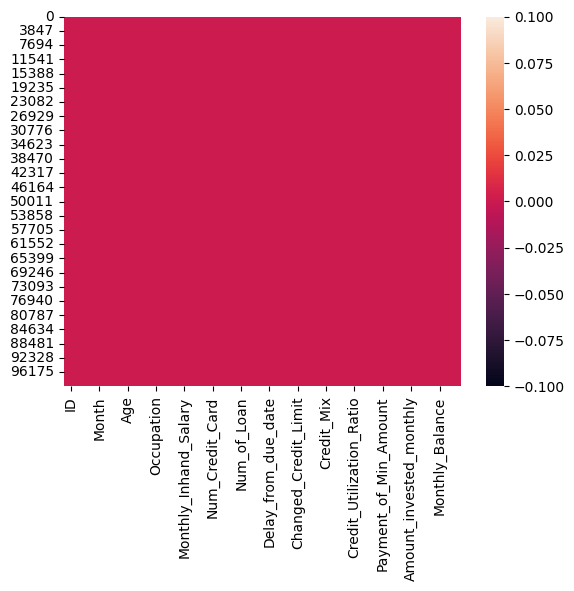

In [9]:
# Visualizing the missing values
sns.heatmap(pb_df.isnull(), cbar=True)

### What did you know about your dataset?

We observe that our dataset has a sizeable 1,00,000 observations and 28 columns. The dataset is clean, meaning there are no visible missing or null values and the datatypes seem to correctly represent the values they are holding. But we need further analysis to be sure. There can be missing values written as a string which will need to cleaned or substituted.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
pb_df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [11]:
# Dataset Describe
pb_df.describe()

ID    Customer_ID          Month            Age  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean    80631.500000   25982.666640       4.500000      33.316340   
std     43301.486619   14340.543051       2.291299      10.764812   
min      5634.000000    1006.000000       1.000000      14.000000   
25%     43132.750000   13664.500000       2.750000      24.000000   
50%     80631.500000   25777.000000       4.500000      33.000000   
75%    118130.250000   38385.000000       6.250000      42.000000   
max    155629.000000   50999.000000       8.000000      56.000000   

                SSN  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  1.000000e+05  100000.000000          100000.000000      100000.000000   
mean   5.004617e+08   50505.123449            4197.270835           5.368820   
std    2.908267e+08   38299.422093            3186.432497           2.593314   
min    8.134900e+04    7005.930000             303.645417           0.000000   
25%    2.451686e+08   19342.972500            1626.594167           3.000000   
50%    5.006886e+08   36999.705000            3095.905000           5.000000   
75%    7.560027e+08   71683.470000            5957.715000           7.000000   
max    9.999934e+08  179987.280000           15204.633333          11.000000   

       Num_Credit_Card  Interest_Rate  ...  Delay_from_due_date  \
count    100000.000000   100000.00000  ...         100000.00000   
mean          5.533570       14.53208  ...             21.08141   
std           2.067098        8.74133  ...             14.80456   
min           0.000000        1.00000  ...              0.00000   
25%           4.000000        7.00000  ...             10.00000   
50%           5.000000       13.00000  ...             18.00000   
75%           7.000000       20.00000  ...             28.00000   
max          11.000000       34.00000  ...             62.00000   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
count           100000.000000         100000.000000         100000.000000   
mean                13.313120             10.470323              5.798250   
std                  6.237166              6.609481              3.867826   
min                  0.000000              0.500000              0.000000   
25%                  9.000000              5.380000              3.000000   
50%                 14.000000              9.400000              5.000000   
75%                 18.000000             14.850000              8.000000   
max                 25.000000             29.980000             17.000000   

       Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
count     100000.000000             100000.000000       100000.000000   
mean        1426.220376                 32.285173          221.220460   
std         1155.129026                  5.116875           99.680716   
min            0.230000                 20.000000            1.000000   
25%          566.072500                 28.052567          144.000000   
50%         1166.155000                 32.305784          219.000000   
75%         1945.962500                 36.496663          302.000000   
max         4998.070000                 50.000000          404.000000   

       Total_EMI_per_month  Amount_invested_monthly  Monthly_Balance  
count        100000.000000            100000.000000    100000.000000  
mean            107.699208                55.101315       392.697586  
std             132.267056                39.006932       201.652719  
min               0.000000                 0.000000         0.007760  
25%              29.268886                27.959111       267.615983  
50%              66.462304                45.156550       333.865366  
75%             147.392573                71.295797       463.215683  
max            1779.103254               434.191089      1183.930696  

[8 rows x 21 columns]

### Variables Description

We can get to know a lot about out dataset by looking at the summary statistics of the dataset. Some of the noteable obrservations are:
1. `Age`: We can see that the mean of customers is around 33 years with the minimum being 14 which seems to be erroneos since 14 year olds are not eligible for financial products due to lack of proper documents. And the maximum age being 56 years which is pretty normal.
2. `Annual Income`: For the annual income we see that most people on an average earn around Rs. 50505 which seems to be quiet low and a maximum annual income of approx Rs. 180000. Which hints that paisabazzar has a low income category customer base
3. `Num Bank Accounts`: Most customers have an average 5 bank accounts with most having between 3 to 7 bank acoounts looking at the standard deviation and Q1 and Q3 quartile figures.
4. `Num Credit Cards`: Most customers also have an average of 5 credit cards with most having between 3 to 7 credit cards looking at the standard deviation and Q1 and Q3 quartile figures.
5. `Interest Rate`: We observe that the average interest rates are at round about 14.5% while it climbs to a max of 34% and a minimum of 1% which seems to be an outlier as it seems to low.
6. `Delay from Due Date`: Most customers have a delay of around 21 days for payment while the maximum is 62 days at max.
7. `Num of Delayed Payment`: Also most people have 13 delayed payments while the maximum goes upto 25 delayed payments. Which isn't very good.
8. `Outstanding Debt`: We also observe that the average debt a person holds is around Rs. 1426 climbs upto Rs. 4998 as a maximum.
9. `Total EMI per Month`: As we can see the average EMI customers have on them is Rs. 107 while the maximum is Rs. 1779.
10. `Amount Invested Monthly`: On an average, customers invest around Rs. 55 and maximum goes upto Rs. 434.

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
pb_df.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10128
Age                             43
SSN                          12500
Occupation                      15
Annual_Income                12488
Monthly_Inhand_Salary        13241
Num_Bank_Accounts               12
Num_Credit_Card                 12
Interest_Rate                   34
Num_of_Loan                     10
Type_of_Loan                  6261
Delay_from_due_date             63
Num_of_Delayed_Payment          26
Changed_Credit_Limit          3452
Num_Credit_Inquiries            18
Credit_Mix                       3
Outstanding_Debt             12203
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          11890
Amount_invested_monthly      12261
Payment_Behaviour                6
Monthly_Balance              98494
Credit_Score                     3
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Dropping unnecessary columns
columns_to_drop = ['ID', 'Customer_ID', 'Name', 'SSN']
pb_df = pb_df.drop(columns=columns_to_drop)

In [14]:
# Monthly_Inhand_Salary is a more granular feature than Annual_Income.
# They are highly correlated, so we drop one to avoid multicollinearity.
pb_df.drop(columns=['Annual_Income'], inplace=True, errors='ignore')

In [15]:
# Convert all column names to a consistent snake_case format for easier access
pb_df.columns = [col.lower().replace(' ', '_') for col in pb_df.columns]

In [16]:
# Identify columns that should be integers but might be floats
int_cols = ['age', 'num_bank_accounts', 'num_credit_card', 'interest_rate', 'num_of_loan',
            'delay_from_due_date', 'num_of_delayed_payment', 'num_credit_inquiries', 'credit_history_age']

for col in int_cols:
    # Using 'Int64' allows for integer types that can handle missing (NaN) values
    pb_df[col] = pd.to_numeric(pb_df[col], errors='coerce').astype('Int64')

# Identify categorical columns and convert them to the 'category' type for efficiency
cat_cols = ['occupation', 'credit_mix', 'payment_of_min_amount', 'payment_behaviour', 'credit_score']
for col in cat_cols:
    pb_df[col] = pb_df[col].astype('category')

In [17]:
# Standardize all non-standard missing value representations to np.nan
missing_value_placeholders = ['No Data', 'Not Specified', 'NM', '!@9#%8', '_']
for col in pb_df.columns:
    # Check if the column is of object type before trying string operations
    if pb_df[col].dtype == 'object':
        for placeholder in missing_value_placeholders:
            pb_df[col] = pb_df[col].str.replace(placeholder, str(np.nan), regex=False)

# Also, handle the 'NM' category in 'payment_of_min_amount'
pb_df['payment_of_min_amount'] = pb_df['payment_of_min_amount'].replace('NM', np.nan)


# Impute missing values for 'payment_of_min_amount' with the mode (most frequent value)
mode_payment = pb_df['payment_of_min_amount'].mode()[0]
pb_df['payment_of_min_amount'].fillna(mode_payment, inplace=True)


# Feature Engineering for 'type_of_loan' before dropping it
# This handles the missing values in 'type_of_loan' by creating meaningful binary features
pb_df['type_of_loan'].fillna('No Loan', inplace=True) # Fill NaN with 'No Loan'
loan_types = ['Auto Loan', 'Credit-Builder Loan', 'Personal Loan', 'Home Equity Loan',
              'Mortgage Loan', 'Student Loan', 'Debt Consolidation Loan', 'Payday Loan']

for loan in loan_types:
    pb_df[f'loan_{loan.lower().replace(" ", "_")}'] = pb_df['type_of_loan'].apply(lambda x: 1 if loan in x else 0)

# Now that we have extracted the information, we can drop the original column
pb_df.drop(columns=['type_of_loan'], inplace=True)


# Impute any remaining numerical missing values with the median
# This is a robust method that is not sensitive to outliers
for col in pb_df.select_dtypes(include=np.number).columns:
    if pb_df[col].isnull().sum() > 0:
        median_val = pb_df[col].median()
        pb_df[col].fillna(median_val, inplace=True)

In [18]:
# Create Debt-to-Income Ratio
# We add a small epsilon to the denominator to avoid division by zero
epsilon = 1e-6
pb_df['debt_to_income_ratio'] = pb_df['total_emi_per_month'] / (pb_df['monthly_inhand_salary'] + epsilon)

In [19]:
# Convert Credit History Age from months to years for better interpretability
pb_df['credit_history_age_years'] = pb_df['credit_history_age'] / 12
pb_df.drop(columns=['credit_history_age'], inplace=True) # Drop the original month column

In [20]:
# Bin Age into categories
age_bins = [0, 25, 40, 60, 110]
age_labels = ['Young_Adult', 'Adult', 'Middle_Aged', 'Senior']
pb_df['age_group'] = pd.cut(pb_df['age'], bins=age_bins, labels=age_labels, right=False)

In [21]:
# Assuming 'payment_behaviour' column is present and cleaned:
pb_df['spending_level'] = pb_df['payment_behaviour'].apply(lambda x: x.split('_')[0] if isinstance(x, str) else 'Unknown')

# CORRECTED LINE: Use index [-3] to get the payment size ('Small', 'Medium', 'Large')
pb_df['payment_size'] = pb_df['payment_behaviour'].apply(lambda x: x.split('_')[-3] if isinstance(x, str) else 'Unknown')

# Now, drop the original column
pb_df.drop(columns=['payment_behaviour'], inplace=True)

# --- Verification Step ---
# It's always a good idea to verify the result after a change.
print("Verification of the new 'payment_size' column:")
print(pb_df['payment_size'].value_counts())

Verification of the new 'payment_size' column:
payment_size
Small     40380
Medium    34137
Large     25483
Name: count, dtype: int64


In [22]:
print(pb_df.isnull().sum())

month                           0
age                             0
occupation                      0
monthly_inhand_salary           0
num_bank_accounts               0
num_credit_card                 0
interest_rate                   0
num_of_loan                     0
delay_from_due_date             0
num_of_delayed_payment          0
changed_credit_limit            0
num_credit_inquiries            0
credit_mix                      0
outstanding_debt                0
credit_utilization_ratio        0
payment_of_min_amount           0
total_emi_per_month             0
amount_invested_monthly         0
monthly_balance                 0
credit_score                    0
loan_auto_loan                  0
loan_credit-builder_loan        0
loan_personal_loan              0
loan_home_equity_loan           0
loan_mortgage_loan              0
loan_student_loan               0
loan_debt_consolidation_loan    0
loan_payday_loan                0
debt_to_income_ratio            0
credit_history

In [23]:
pb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 33 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   month                         100000 non-null  int64   
 1   age                           100000 non-null  Int64   
 2   occupation                    100000 non-null  category
 3   monthly_inhand_salary         100000 non-null  float64 
 4   num_bank_accounts             100000 non-null  Int64   
 5   num_credit_card               100000 non-null  Int64   
 6   interest_rate                 100000 non-null  Int64   
 7   num_of_loan                   100000 non-null  Int64   
 8   delay_from_due_date           100000 non-null  Int64   
 9   num_of_delayed_payment        100000 non-null  Int64   
 10  changed_credit_limit          100000 non-null  float64 
 11  num_credit_inquiries          100000 non-null  Int64   
 12  credit_mix                    1

In [24]:
print(pb_df.tail(10))

       month  age occupation  monthly_inhand_salary  num_bank_accounts  \
99990      7   28  Architect            1929.906667                 10   
99991      8   29  Architect            1929.906667                 10   
99992      1   24   Mechanic            3359.415833                  4   
99993      2   25   Mechanic            3359.415833                  4   
99994      3   25   Mechanic            3359.415833                  4   
99995      4   25   Mechanic            3359.415833                  4   
99996      5   25   Mechanic            3359.415833                  4   
99997      6   25   Mechanic            3359.415833                  4   
99998      7   25   Mechanic            3359.415833                  4   
99999      8   25   Mechanic            3359.415833                  4   

       num_credit_card  interest_rate  num_of_loan  delay_from_due_date  \
99990                8             29            5                   33   
99991                8             

### What all manipulations have you done and insights you found?

Since the dataset was already clean, only the unncessesary columns like 'ID', 'Customer_ID', 'Name' and 'SSN' was dropped from the dataset as they cannot contribute anything meaningful.

Also, I created bins for the age groups as it will help us visualize them in a bar chart otherwise the visualization for age will not be proper as there are a lot of numbers.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

**Univariate Analysis**

#### Chart - 1

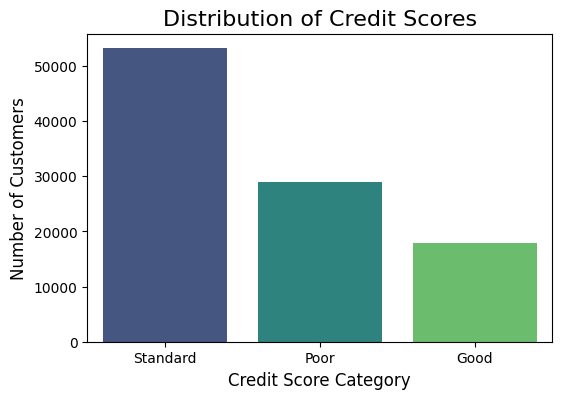

In [25]:
# Chart - 1 visualization code
plt.figure(figsize=(6, 4))
sns.countplot(x='credit_score', data=pb_df, palette='viridis', order=pb_df['credit_score'].value_counts().index)
plt.title('Distribution of Credit Scores', fontsize=16)
plt.xlabel('Credit Score Category', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

A count plot (or bar chart) is the best choice for visualizing the distribution of a categorical variable. It clearly shows the frequency of each category, making it easy to see which credit scores are most common in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The chart shows us that the 'Standard' credit score is the most frequent category, followed by 'Good', and then 'Poor'. This indicates that the dataset is imbalanced, with fewer instances of 'Poor' credit scores compared to the other two categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Understanding the distribution of the target variable is crucial. The imbalance means that a machine learning model might become biased towards predicting the majority class ('Standard'). This insight tells us that we will need to use techniques to handle imbalanced data (like SMOTE or using class weights) to build a fair and accurate model. For the business, it's critical to accurately identify the minority 'Poor' class to mitigate risk.

#### Chart - 2

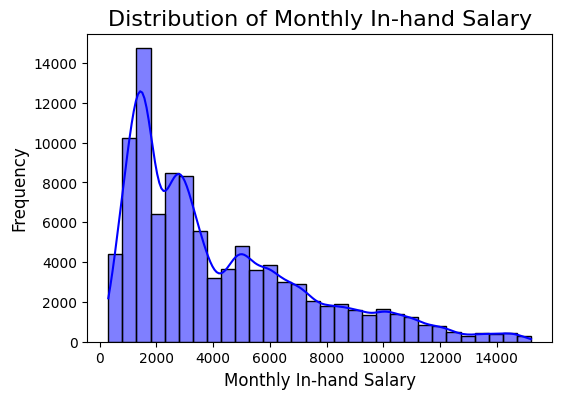

In [26]:
# Chart - 2 visualization code
plt.figure(figsize=(6, 4))
sns.histplot(pb_df['monthly_inhand_salary'], kde=True, bins=30, color='blue')
plt.title('Distribution of Monthly In-hand Salary', fontsize=16)
plt.xlabel('Monthly In-hand Salary', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

A histogram with a Kernel Density Estimate (KDE) is perfect for visualizing the distribution of a numerical variable. It displays the frequency of different salary ranges and the overall shape of the distribution, highlighting the central tendency and skewness.

##### 2. What is/are the insight(s) found from the chart?

The distribution of monthly_inhand_salary is heavily right-skewed. This means that the majority of customers have a lower monthly salary, while a smaller number of customers have very high salaries.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This insight helps in customer segmentation. Since most customers fall into a lower-income bracket, Paisabazaar could tailor specific loan products or financial advice for this group. It also indicates that outlier treatment might be necessary for this feature before feeding it into certain machine learning models that are sensitive to skewed data.

#### Chart - 3

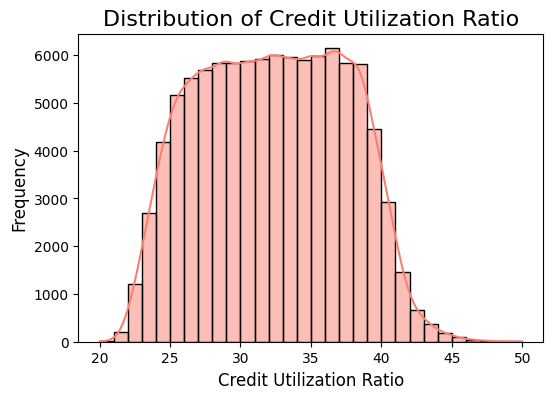

In [27]:
# Chart - 3 visualization code
plt.figure(figsize=(6, 4))
sns.histplot(pb_df['credit_utilization_ratio'], kde=True, bins=30, color='salmon')
plt.title('Distribution of Credit Utilization Ratio', fontsize=16)
plt.xlabel('Credit Utilization Ratio', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

Similar to the salary chart, a histogram with a KDE is perfect for understanding the distribution of this critical numerical feature. It helps us see what a "typical" credit utilization looks like for the customers in this dataset.

##### 2. What is/are the insight(s) found from the chart?

The credit_utilization_ratio appears to be somewhat normally distributed, with a slight right skew. The majority of customers have a utilization ratio between 25% and 40%. A high credit utilization ratio is generally considered a sign of financial distress.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, since this is a key metric for credit scoring. The business can use this insight to identify customers who are over-leveraged (high utilization) and might be at a higher risk of default. They could offer these customers debt consolidation products or financial counseling.

#### Chart - 4

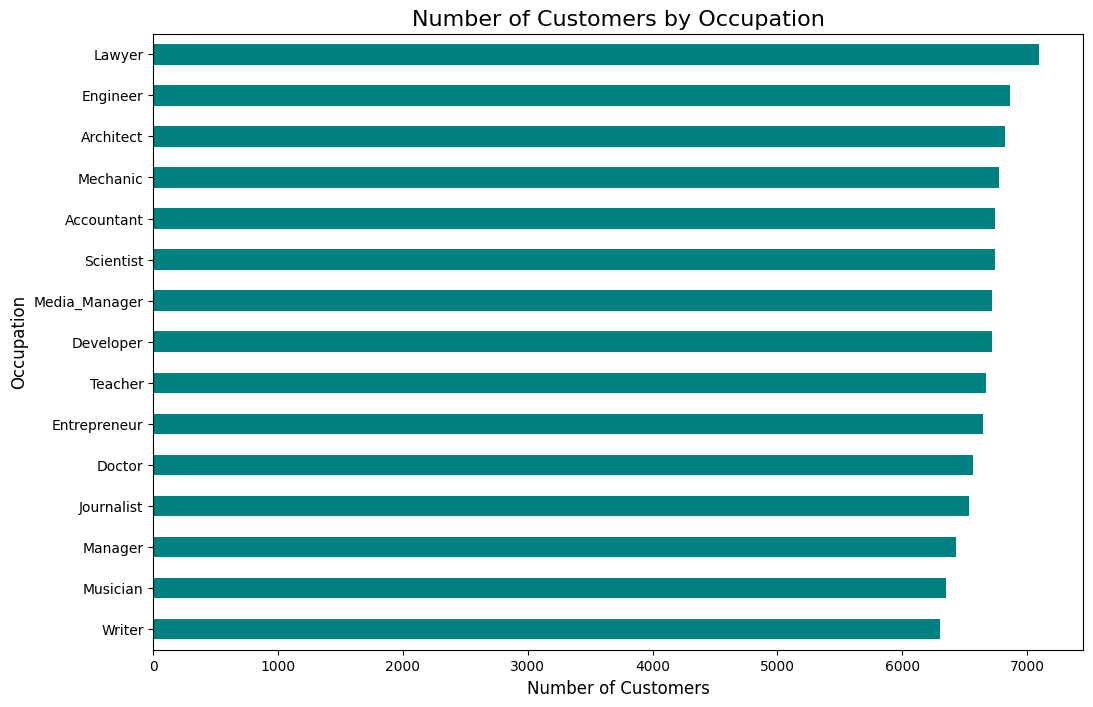

In [28]:
# Chart - 4 visualization code
plt.figure(figsize=(12, 8))
pb_df['occupation'].value_counts().sort_values(ascending=True).plot(kind='barh', color='teal')
plt.title('Number of Customers by Occupation', fontsize=16)
plt.xlabel('Number of Customers', fontsize=12)
plt.ylabel('Occupation', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is excellent for displaying the frequency of categorical data, especially when there are many categories with long names. It's much easier to read the occupation labels this way compared to a vertical bar chart.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals the most and least common occupations in the dataset. Occupations like Lawyer, Engineer, and Architect appear frequently, while others are a little less common.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This helps in understanding the customer base. If certain occupations are more prevalent, marketing efforts can be targeted towards these groups.

**Bivariate Analysis**

#### Chart - 5

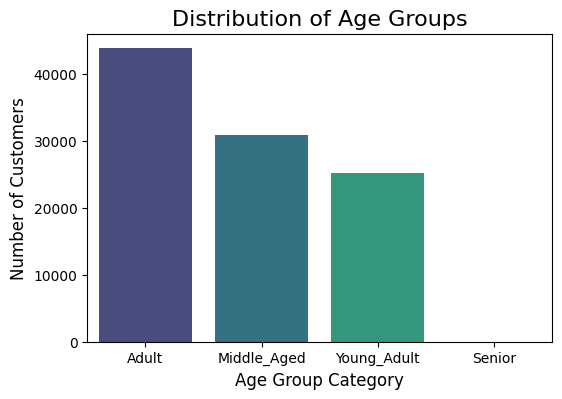

In [29]:
# Chart - 5 visualization code
plt.figure(figsize=(6, 4))
sns.countplot(x='age_group', data=pb_df, palette='viridis', order=pb_df['age_group'].value_counts().index)
plt.title('Distribution of Age Groups', fontsize=16)
plt.xlabel('Age Group Category', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

A barplot is ideal for visualizing the distribution of a categorical column. It makes it easier to draw conclusions at a glance.

##### 2. What is/are the insight(s) found from the chart?

We can observe that the most common group is the Adult group (aged between 25-40) followed by Middle-Aged (aged 40-60) and then Young-Adults (aged 0-25). We see that there are no Seniors which makes sense as the business has no relevant products for the class.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the business can make targeted ads and marketing campaigns for the most popular class or work towards products designed for more of the Young Adult class to increase the market share in that group.

#### Chart - 6

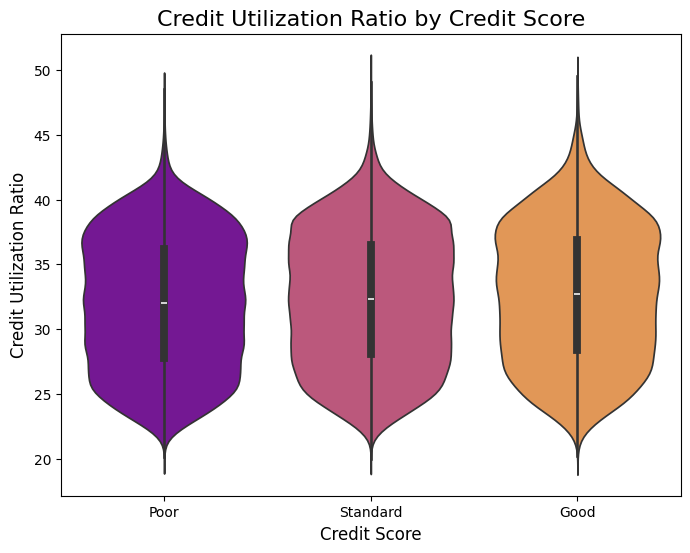

In [30]:
# Chart - 6 visualization code
plt.figure(figsize=(8, 6))
sns.violinplot(x='credit_score', y='credit_utilization_ratio', data=pb_df, palette='plasma', order=['Poor', 'Standard', 'Good'])
plt.title('Credit Utilization Ratio by Credit Score', fontsize=16)
plt.xlabel('Credit Score', fontsize=12)
plt.ylabel('Credit Utilization Ratio', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

A violin plot is an enhanced version of a box plot. It not only shows the median and quartiles but also the full density of the data. This is useful for seeing the shape of the distribution for each credit score category.

##### 2. What is/are the insight(s) found from the chart?

Customers with a 'Poor' credit score tend to have a wider and slightly higher distribution of credit utilization ratios. Conversely, those with a 'Good' credit score have a more concentrated distribution at a lower utilization ratio. This indicates that lower and more controlled credit utilization is associated with better credit scores.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This reinforces the importance of the credit utilization ratio as a risk indicator. The business can use this to educate customers: maintaining a lower credit utilization ratio can help improve their credit score. This can lead to a healthier customer portfolio for Paisabazaar in the long run.

#### Chart - 7

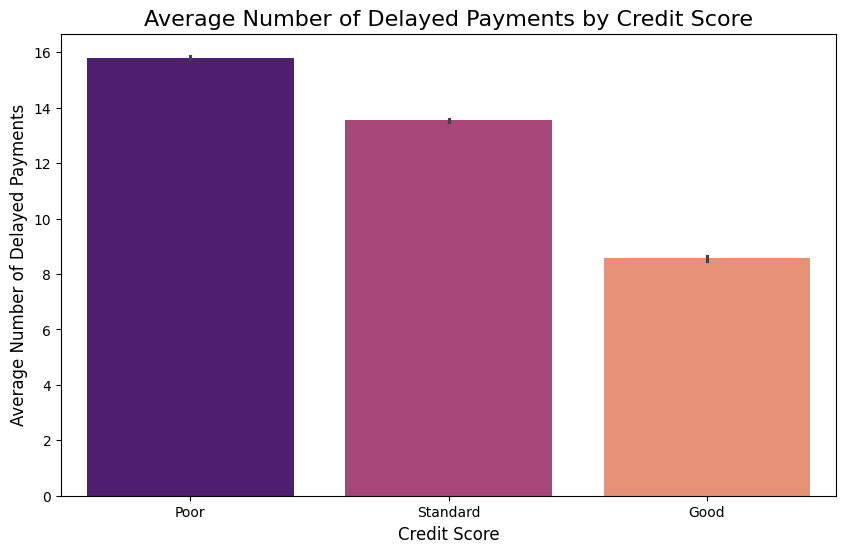

In [31]:
# Chart - 7 visualization code
plt.figure(figsize=(10, 6))
sns.barplot(x='credit_score', y='num_of_delayed_payment', data=pb_df, palette='magma', order=['Poor', 'Standard', 'Good'])
plt.title('Average Number of Delayed Payments by Credit Score', fontsize=16)
plt.xlabel('Credit Score', fontsize=12)
plt.ylabel('Average Number of Delayed Payments', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot is effective for comparing an average numerical value across different categories. Here, it clearly shows the average num_of_delayed_payment for each credit_score category.

##### 2. What is/are the insight(s) found from the chart?

There is a strong negative correlation. The average number of delayed payments is highest for customers with a 'Poor' credit score and lowest for those with a 'Good' credit score. This is a very intuitive and powerful finding.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This is a cornerstone of credit risk assessment. The insight directly validates that payment history is a critical factor. The business can use this to emphasize the importance of timely payments to its customers. Models built on this feature will be more robust in predicting defaults.

#### Chart - 8

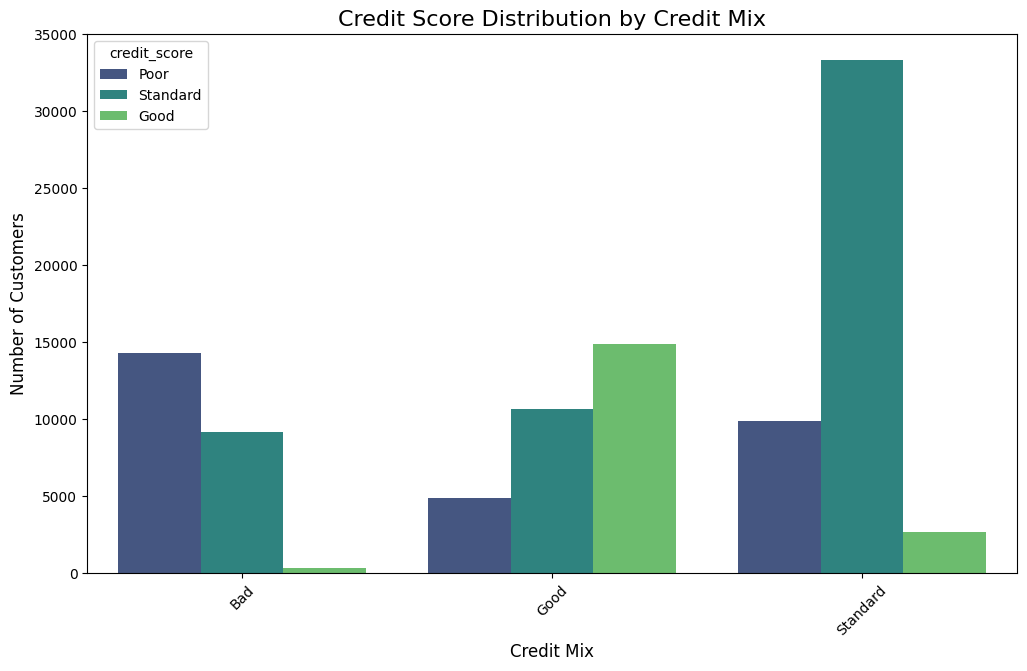

In [32]:
# Chart - 8 visualization code
plt.figure(figsize=(12, 7))
sns.countplot(x='credit_mix', hue='credit_score', data=pb_df, palette='viridis', hue_order=['Poor', 'Standard', 'Good'])
plt.title('Credit Score Distribution by Credit Mix', fontsize=16)
plt.xlabel('Credit Mix', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

A grouped bar chart is perfect for visualizing the relationship between two categorical variables. It allows us to see the distribution of credit_score within each category of credit_mix.

##### 2. What is/are the insight(s) found from the chart?

Customers with a 'Good' credit_mix are overwhelmingly more likely to have a 'Good' credit score. Conversely, customers with a 'Bad' credit_mix have a much higher proportion of 'Poor' credit scores. The 'Standard' credit mix is associated mostly with 'Standard' credit scores.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This shows that the diversity of credit products a customer holds is a significant indicator of their financial management skills. Paisabazaar can use this insight to offer "credit-builder" products to customers with a 'Bad' or 'Standard' mix to help them diversify their credit portfolio and improve their score over time.

#### Chart - 9

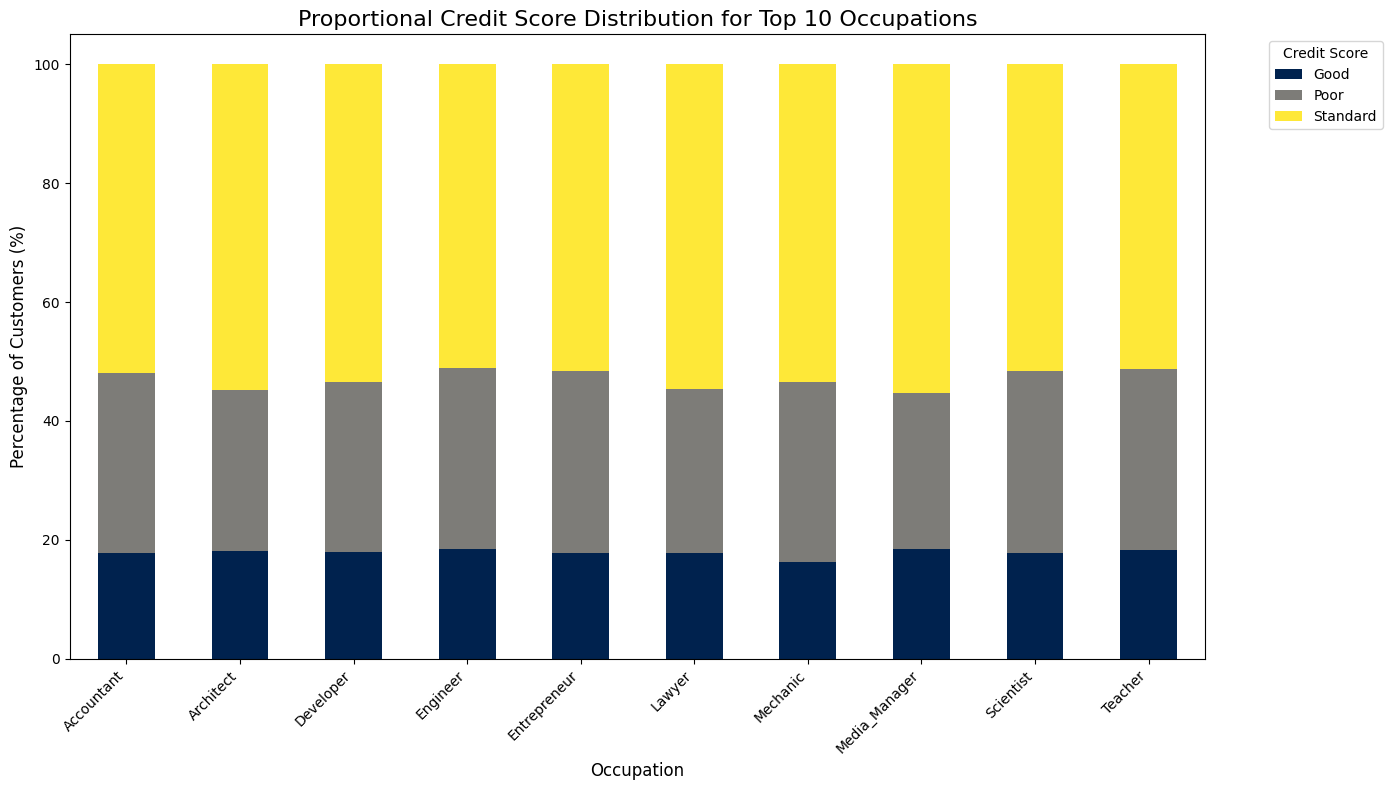

In [33]:
# Chart - 9 visualization code
# To make the chart readable, let's focus on the top 10 most frequent occupations
top_10_occupations = pb_df['occupation'].value_counts().nlargest(10).index
df_top_occupations = pb_df[pb_df['occupation'].isin(top_10_occupations)]

# Create a 100% stacked bar chart
occupation_credit_crosstab = pd.crosstab(df_top_occupations['occupation'], df_top_occupations['credit_score'], normalize='index') * 100
occupation_credit_crosstab.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='cividis')

plt.title('Proportional Credit Score Distribution for Top 10 Occupations', fontsize=16)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Percentage of Customers (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Credit Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A 100% stacked bar chart is excellent for comparing the proportional distribution of a categorical variable (credit_score) across different categories of another (occupation). By normalizing each bar to 100%, we can easily compare the occupations without being biased by the total number of customers in each profession.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that some occupations have a higher proportion of 'Good' credit scores than others. For example, professions like 'Engineer' and 'Media Manager' appear to have a larger blue segment ('Good' score) compared to others. This suggests a correlation between profession and creditworthiness.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This provides valuable information for targeted marketing and risk assessment. The business could create specialized marketing campaigns for professions that show a higher propensity for good credit. It can also be used as a feature in the ML model to improve its predictive accuracy.

#### Chart - 10

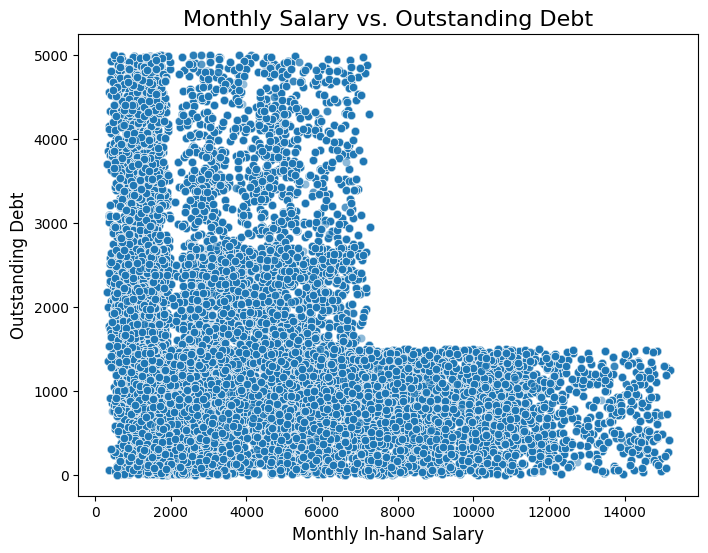

In [34]:
# Chart - 10 visualization code
plt.figure(figsize=(8, 6))
sns.scatterplot(x='monthly_inhand_salary', y='outstanding_debt', data=pb_df, alpha=0.5)
plt.title('Monthly Salary vs. Outstanding Debt', fontsize=16)
plt.xlabel('Monthly In-hand Salary', fontsize=12)
plt.ylabel('Outstanding Debt', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is the standard chart for visualizing the relationship between two numerical variables. It helps to identify patterns, trends, or correlations between them.

##### 2. What is/are the insight(s) found from the chart?

We have a very interesting graph here. We see that outstanding debt is higher and almost constant for people with salary less than 7000 and after 7000 the outstanding debt takes a huge drop and is constant thereafter.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This indicates that people with lower incomes tend to have more outstanding loans due to their financial distress and people on a higher income bracket tend to have lower outstanding debt because of higher income and better financial position.

**Multivariate Analysis**

#### Chart - 11

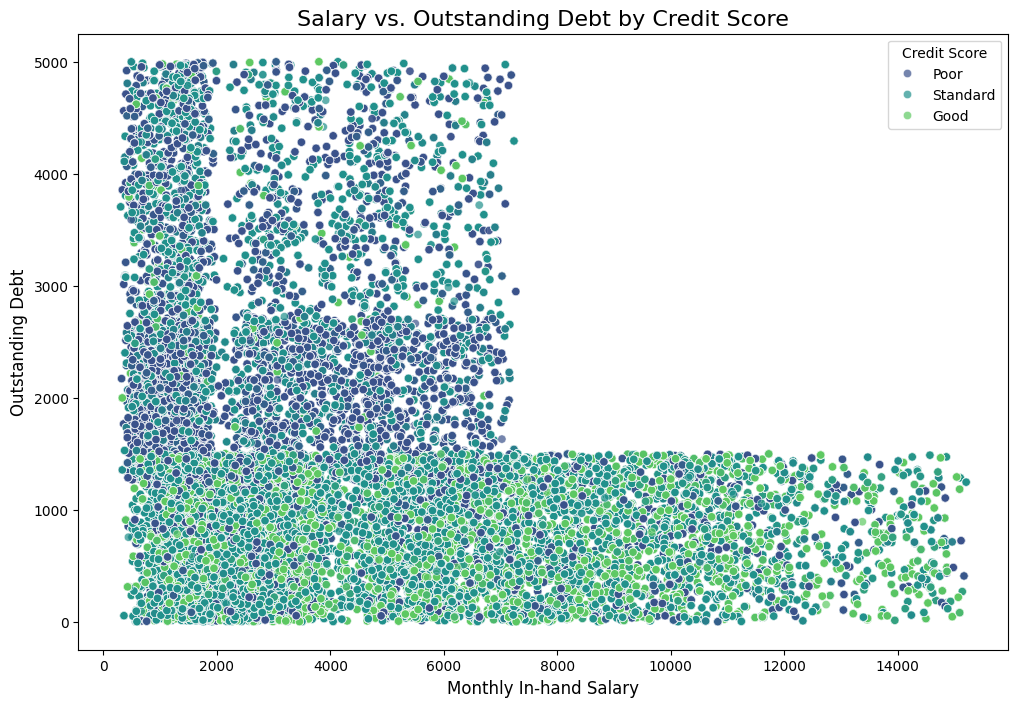

In [35]:
# Chart - 11 visualization code
plt.figure(figsize=(12, 8))
sns.scatterplot(x='monthly_inhand_salary', y='outstanding_debt', hue='credit_score', data=pb_df,
                palette='viridis', hue_order=['Poor', 'Standard', 'Good'], alpha=0.7)
plt.title('Salary vs. Outstanding Debt by Credit Score', fontsize=16)
plt.xlabel('Monthly In-hand Salary', fontsize=12)
plt.ylabel('Outstanding Debt', fontsize=12)
plt.legend(title='Credit Score')
plt.show()

##### 1. Why did you pick the specific chart?

This is a multivariate scatter plot. By using color (hue) to represent a third variable (credit_score), we can visualize the interaction between three variables simultaneously. It builds upon our earlier bivariate scatter plot to add another layer of insight.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that customers with 'Poor' credit scores (darker dots) tend to be clustered in the left quadrant approx till Rs. 7000 monthly-in-hand salary, representing lower income and higher outstanding debt. 'Good' credit scores (brighter dots) are spread across all income levels but are more dominant in the higher-income brackets.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This visualization helps to create a more nuanced understanding of risk. It's not just about having debt, but about the relationship between debt and income. The business can see that high-income individuals have lower levels of outstanding debt which leads to their credit score being higher while lower levels of income have higher outstanding debt leading to poor credit ratings. This can inform the creation of more stricter lending rules for the lower income strata.

#### Chart - 12

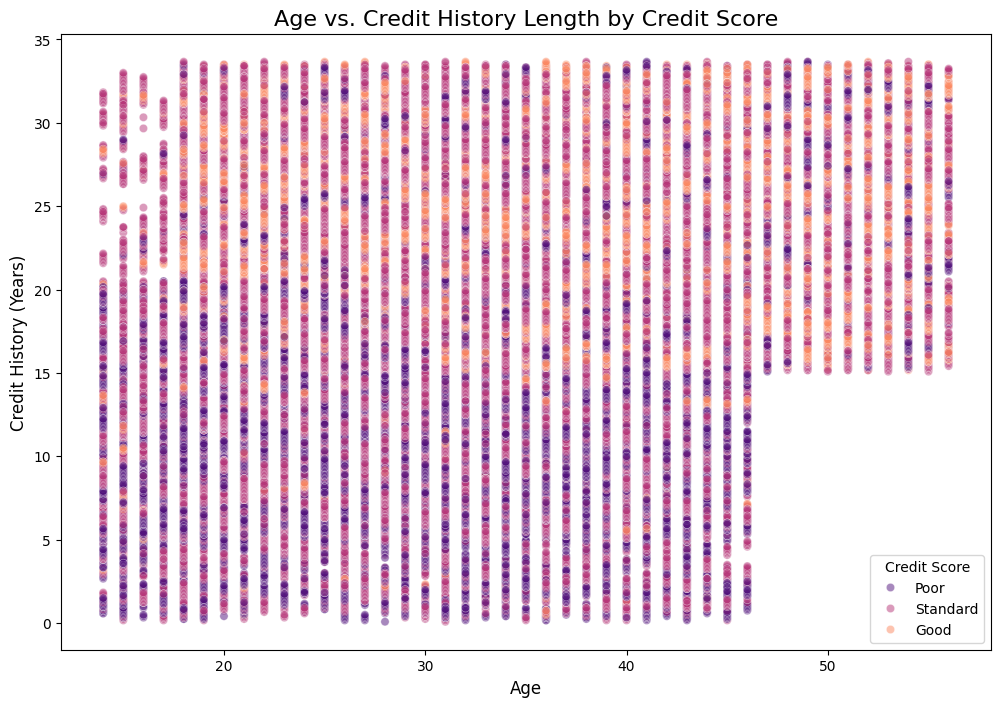

In [36]:
# Chart - 12 visualization code
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='credit_history_age_years', hue='credit_score', data=pb_df,
                palette='magma', hue_order=['Poor', 'Standard', 'Good'], alpha=0.5)
plt.title('Age vs. Credit History Length by Credit Score', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Credit History (Years)', fontsize=12)
plt.legend(title='Credit Score')
plt.show()

##### 1. Why did you pick the specific chart?

This scatter plot with a hue is used to explore the relationship between a customer's age, the length of their credit history, and their resulting credit score. It helps to see if older customers with longer histories are more likely to have better scores.

##### 2. What is/are the insight(s) found from the chart?

We observe that the 'Good' credit scores (brighter dots) are more prevalent among customers with a longer credit history. 'Poor' scores are more common among those with shorter credit histories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This highlights the value of a long and stable credit history. The business can use this to its advantage by offering better terms to customers who have demonstrated responsible credit management over a long period. It also suggests that younger customers or new immigrants with shorter credit histories might need different types of products (like secured credit cards) to help them build their credit history.

#### Chart - 13

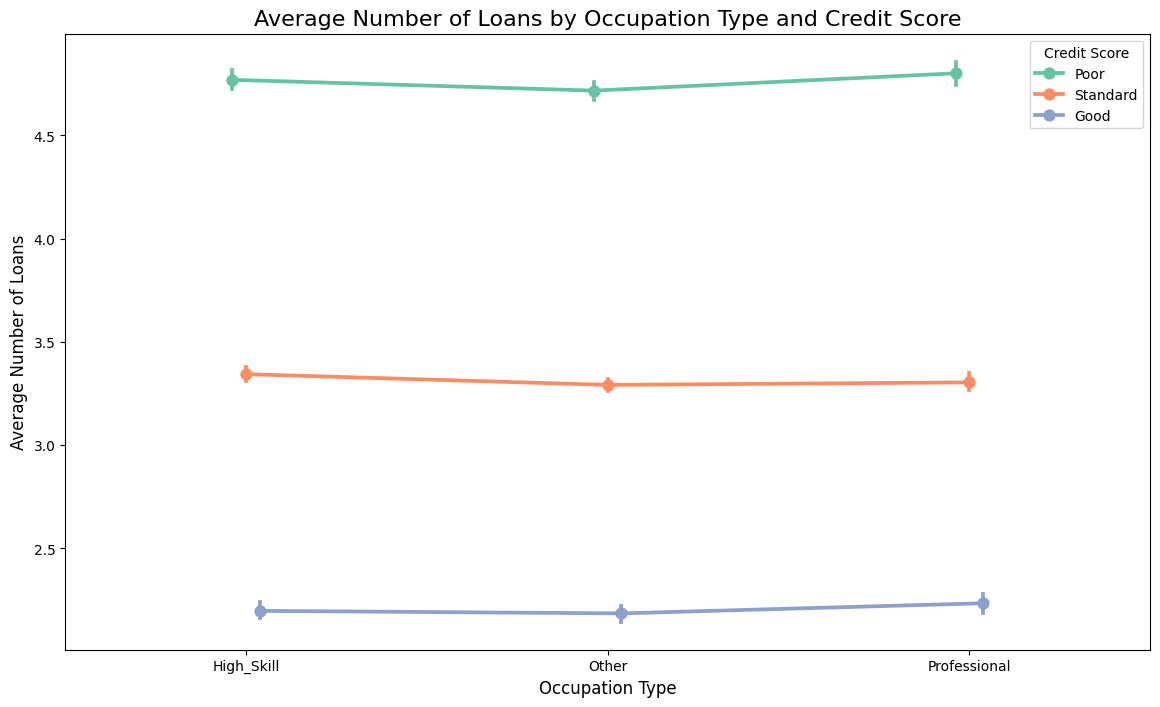

In [37]:
# Chart - 13 visualization code
# Let's create a simplified 'Occupation_Type' for better visualization
def map_occupation(occ):
    if occ in ['Doctor', 'Lawyer', 'Engineer', 'Scientist', 'Architect']:
        return 'High_Skill'
    elif occ in ['Manager', 'Accountant', 'Developer', 'Media_Manager']:
        return 'Professional'
    else:
        return 'Other'

pb_df['occupation_type'] = pb_df['occupation'].apply(map_occupation)

plt.figure(figsize=(14, 8))
sns.pointplot(x='occupation_type', y='num_of_loan', hue='credit_score', data=pb_df,
              palette='Set2', dodge=True, hue_order=['Poor', 'Standard', 'Good'])
plt.title('Average Number of Loans by Occupation Type and Credit Score', fontsize=16)
plt.xlabel('Occupation Type', fontsize=12)
plt.ylabel('Average Number of Loans', fontsize=12)
plt.legend(title='Credit Score')
plt.show()

# Clean up the created column
pb_df.drop(columns=['occupation_type'], inplace=True)

##### 1. Why did you pick the specific chart?

A point plot is excellent for showing the central tendency of a numerical variable (num_of_loan) across different categories, while also allowing for a third categorical variable (credit_score) using hue. The lines connecting the points make it easy to see trends and interactions between the categories.

##### 2. What is/are the insight(s) found from the chart?

Across all occupation types, customers with 'Poor' credit scores tend to have a higher average number of loans compared to those with 'Good' or 'Standard' scores. This suggests that having too many loans, especially for certain professions, might be a sign of financial over-extension.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This provides a nuanced view of risk. It's not just the number of loans, but the number of loans in the context of a person's profession and their overall credit score. This could help the business refine its lending criteria, perhaps by being more cautious about extending additional credit to individuals in certain segments who already have a high number of loans.

#### Chart - 14 - Correlation Heatmap

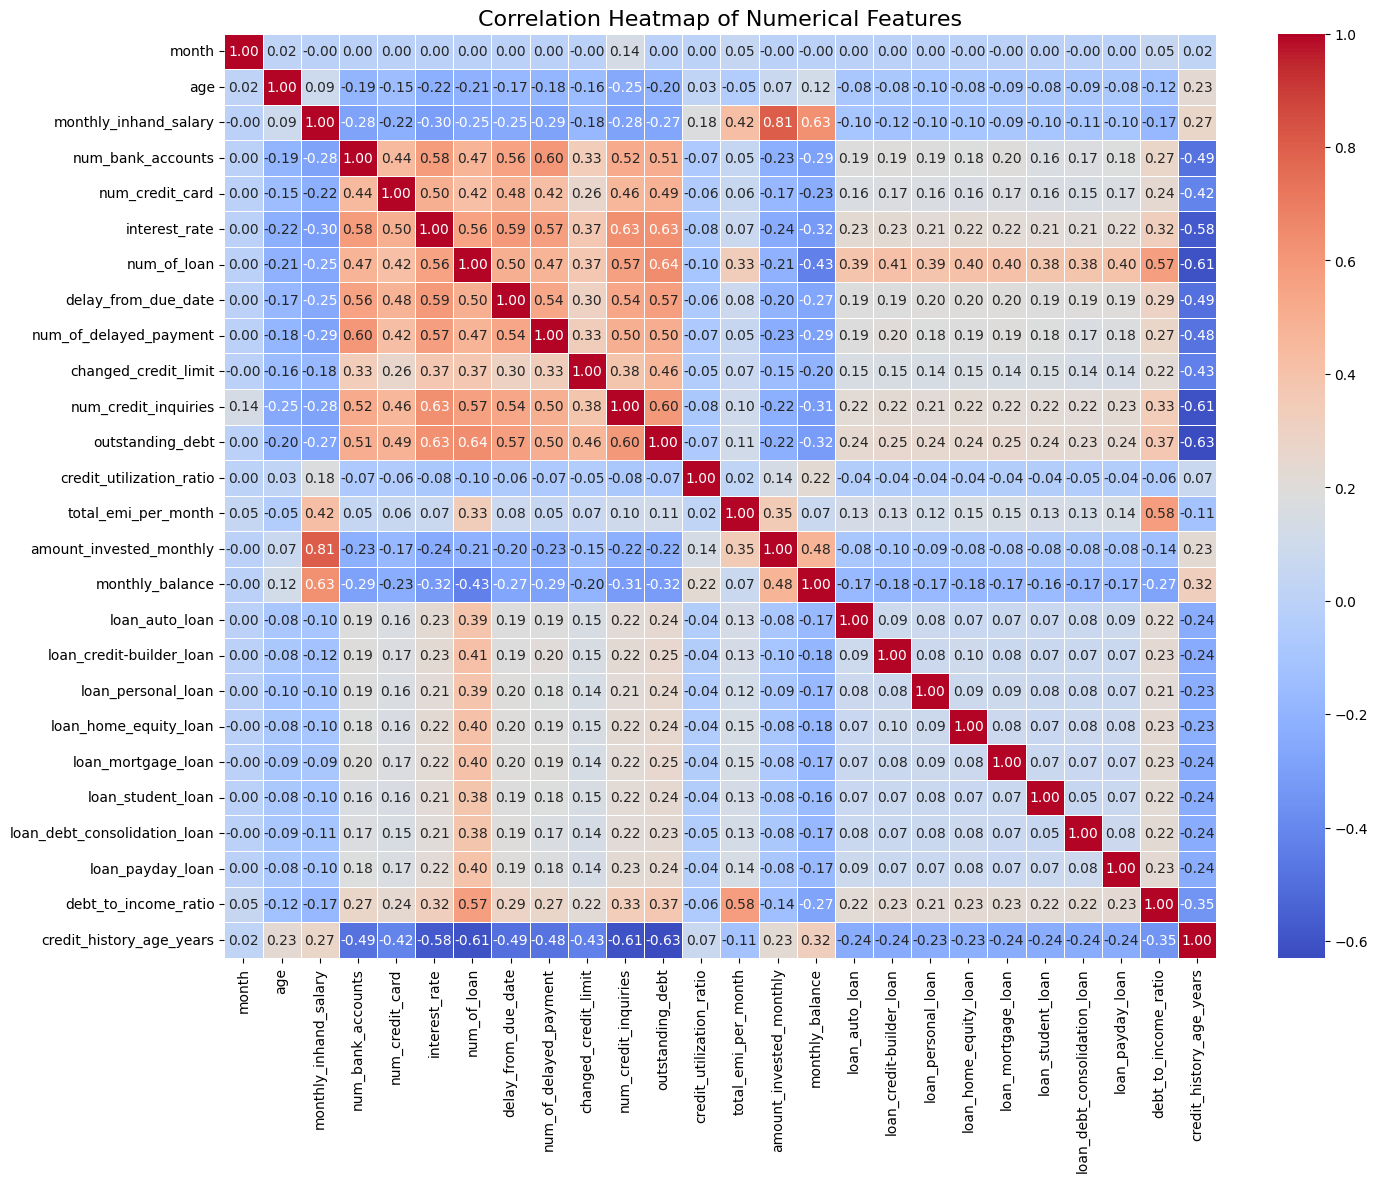

In [38]:
# Correlation Heatmap visualization code
# First, we need to convert the categorical target variable to a numerical format for correlation
credit_score_mapping = {'Poor': 0, 'Standard': 1, 'Good': 2}
pb_df['credit_score_encoded'] = pb_df['credit_score'].map(credit_score_mapping)

# Select only numerical columns for the heatmap
numerical_df = pb_df.select_dtypes(include=np.number)

plt.figure(figsize=(16, 12))
sns.heatmap(numerical_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()

# We can drop the encoded column after visualization if we want
pb_df.drop(columns=['credit_score_encoded'], inplace=True)

##### 1. Why did you pick the specific chart?

A correlation heatmap is the best way to visualize the linear relationships between all numerical variables in the dataset at once. The colors and annotations make it easy to spot strong positive (red) and negative (blue) correlations.

##### 2. What is/are the insight(s) found from the chart?

We observe that credit history age and outstanding debt has a negative correlation, debt to income ratio has a postive correlation with total emi per month, amount invested monthly is highly positively correlated with monthly in hand salary.

#### Chart - 15 - Pair Plot

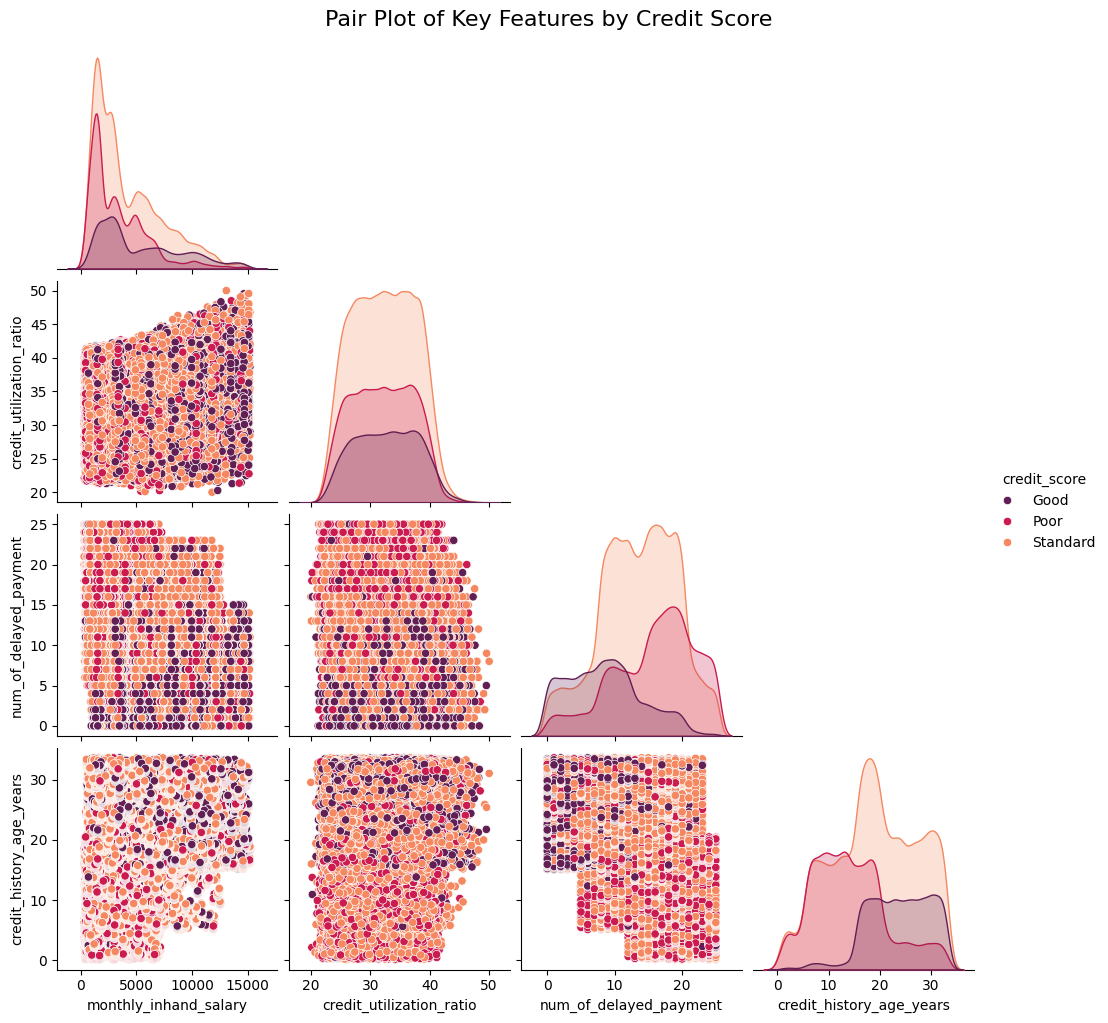

In [39]:
# Pair Plot visualization code
# A pair plot can be computationally expensive. It's best to select a few key features.
key_features = ['monthly_inhand_salary', 'credit_utilization_ratio', 'num_of_delayed_payment', 'credit_history_age_years', 'credit_score']
sns.pairplot(pb_df[key_features], hue='credit_score', palette='rocket', corner=True)
plt.suptitle('Pair Plot of Key Features by Credit Score', y=1.02, fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot is a powerful tool for multivariate analysis. It creates a grid of plots showing the relationship between each pair of variables in a selected subset of the data. The diagonal shows the distribution of each individual variable. Using hue adds a categorical dimension to every plot.

##### 2. What is/are the insight(s) found from the chart?

This single visualization summarizes many of our previous findings. We can clearly see:
The distributions of each variable for each credit score category on the diagonal.
The separation between credit score classes in the scatter plots. For example, the plot of credit_utilization_ratio vs. num_of_delayed_payment shows that the 'Poor' scores cluster where both values are high, while 'Good' scores cluster where both are low.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. Hypothetical Statement 1: A customer's monthly salary has a significant impact on their credit score. We hypothesize that the mean salary is different across the 'Good', 'Standard', and 'Poor' credit score groups.
2. Hypothetical Statement 2: The mix of credit products a customer holds is related to their credit score. We hypothesize that Credit_Mix and Credit_Score are not independent variables.
3. Hypothetical Statement 3: Customers with 'Poor' credit scores have a significantly higher number of delayed payments than customers with 'Good' credit scores.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Research Question: Is there a statistically significant difference in the mean monthly in-hand salary among the three credit score groups ('Poor', 'Standard', 'Good')?
1. State Your research hypothesis as a null hypothesis and alternate hypothesis.
* Null Hypothesis (H₀): There is no significant difference in the mean monthly in-hand salary across the three credit score groups.

* Alternate Hypothesis (H₁): At least one credit score group has a different mean monthly in-hand salary from the others.


#### 2. Perform an appropriate statistical test.

In [40]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import f_oneway

# Create separate data series for each credit score category
salary_poor = pb_df[pb_df['credit_score'] == 'Poor']['monthly_inhand_salary']
salary_standard = pb_df[pb_df['credit_score'] == 'Standard']['monthly_inhand_salary']
salary_good = pb_df[pb_df['credit_score'] == 'Good']['monthly_inhand_salary']

# Perform the ANOVA test
f_statistic, p_value = f_oneway(salary_poor, salary_standard, salary_good)

print(f"F-Statistic: {f_statistic:.4f}")
print(f"P-Value: {p_value:.10f}")

# Conclusion based on the p-value
alpha = 0.05
if p_value < alpha:
    print("\nConclusion: We reject the null hypothesis.")
    print("There is a statistically significant difference in the mean monthly salary across the different credit score groups.")
else:
    print("\nConclusion: We fail to reject the null hypothesis.")
    print("There is no statistically significant difference in the mean monthly salary across the different credit score groups.")

F-Statistic: 2330.7371
P-Value: 0.0000000000

Conclusion: We reject the null hypothesis.
There is a statistically significant difference in the mean monthly salary across the different credit score groups.


##### Which statistical test have you done to obtain P-Value?

I have used the ANOVA (Analysis of Variance) test.

##### Why did you choose the specific statistical test?

ANOVA is the appropriate statistical test for this situation because:
We are comparing the means of a numerical variable (monthly_inhand_salary).
We are comparing these means across more than two independent groups (the three credit_score categories: 'Poor', 'Standard', and 'Good').

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Research Question: Is there a statistically significant association between a customer's credit mix and their credit score?
1. State Your research hypothesis as a null hypothesis and alternate hypothesis.
* Null Hypothesis (H₀): The credit_mix and credit_score variables are independent. There is no association between them.
* Alternate Hypothesis (H₁): The credit_mix and credit_score variables are dependent. There is a significant association between them.

#### 2. Perform an appropriate statistical test.

In [41]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# Create a contingency table (crosstab) of the two categorical variables
contingency_table = pd.crosstab(pb_df['credit_mix'], pb_df['credit_score'])

print("Contingency Table:")
print(contingency_table)

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-Square Statistic: {chi2_stat:.4f}")
print(f"P-Value: {p_value:.10f}")
print(f"Degrees of Freedom: {dof}")

# Conclusion based on the p-value
alpha = 0.05
if p_value < alpha:
    print("\nConclusion: We reject the null hypothesis.")
    print("There is a statistically significant association between Credit Mix and Credit Score.")
else:
    print("\nConclusion: We fail to reject the null hypothesis.")
    print("There is no statistically significant association between Credit Mix and Credit Score.")

Contingency Table:
credit_score   Good   Poor  Standard
credit_mix                          
Bad             351  14289      9128
Good          14848   4851     10685
Standard       2629   9858     33361

Chi-Square Statistic: 40489.4177
P-Value: 0.0000000000
Degrees of Freedom: 4

Conclusion: We reject the null hypothesis.
There is a statistically significant association between Credit Mix and Credit Score.


##### Which statistical test have you done to obtain P-Value?

I have used the Chi-Square Test.

##### Why did you choose the specific statistical test?

The Chi-Square test is the correct choice here because:
We are testing for an association or relationship between two variables.
Both of the variables involved (credit_mix and credit_score) are categorical.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Research Question: Do customers with 'Poor' credit scores have a significantly higher average number of delayed payments than customers with 'Good' credit scores?
1. State Your research hypothesis as a null hypothesis and alternate hypothesis.
* Null Hypothesis (H₀): The mean number of delayed payments for customers with 'Poor' credit scores is less than or equal to the mean for customers with 'Good' credit scores.

* Alternate Hypothesis (H₁): The mean number of delayed payments for customers with 'Poor' credit scores is greater than the mean for customers with 'Good' credit scores.

#### 2. Perform an appropriate statistical test.

In [42]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Create two data series for the groups we want to compare
delayed_payments_poor = pb_df[pb_df['credit_score'] == 'Poor']['num_of_delayed_payment']
delayed_payments_good = pb_df[pb_df['credit_score'] == 'Good']['num_of_delayed_payment']

# Perform an independent two-sample t-test
# We use a one-tailed test because our hypothesis is directional ('greater')
# We set equal_var=False (Welch's t-test) as it's more robust if the group variances are different
t_statistic, p_value = ttest_ind(delayed_payments_poor, delayed_payments_good, equal_var=False, alternative='greater')

print(f"T-Statistic: {t_statistic:.4f}")
print(f"P-Value: {p_value}")

# Conclusion based on the p-value
alpha = 0.05
if p_value < alpha:
    print("\nConclusion: We reject the null hypothesis.")
    print("There is strong statistical evidence that customers with 'Poor' credit scores have a higher average number of delayed payments than those with 'Good' credit scores.")
else:
    print("\nConclusion: We fail to reject the null hypothesis.")
    print("We do not have enough statistical evidence to say that customers with 'Poor' credit scores have a higher average number of delayed payments.")

T-Statistic: 132.1736
P-Value: 0.0

Conclusion: We reject the null hypothesis.
There is strong statistical evidence that customers with 'Poor' credit scores have a higher average number of delayed payments than those with 'Good' credit scores.


##### Which statistical test have you done to obtain P-Value?

I have used the Independent Samples t-test (specifically, Welch's t-test).

##### Why did you choose the specific statistical test?

The t-test is the appropriate choice for this hypothesis because:
* We are comparing the means of a numerical variable (num_of_delayed_payment).
* We are comparing these means between two independent groups ('Poor' and 'Good' credit score customers).
* Our alternate hypothesis is directional (we are testing if one mean is greater than the other), which is handled by the alternative='greater' parameter.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [43]:
# In the previous Data Wrangling step, we have already handled all missing values.
# We can confirm this by checking for any remaining nulls.
print("Count of missing values in each column:")
print(pb_df.isnull().sum().sum())

Count of missing values in each column:
0


#### What all missing value imputation techniques have you used and why did you use those techniques?

In the data wrangling phase, we used a combination of techniques:
* **Standardization**: We first identified all non-standard missing value representations (like 'NM', 'No Data') and converted them to a standard np.nan format.
* **Mode Imputation**: For the Payment_of_Min_Amount column, we used mode imputation. This was chosen because the variable is categorical, and filling missing values with the most frequent category is a robust way to preserve the overall distribution without introducing bias, especially when the number of missing values is relatively small.
* **Feature Engineering as Imputation**: For the Type_of_Loan column, instead of simple imputation, we engineered new binary features (e.g., loan_auto_loan). This approach is superior because it not only handles the missing values (by assigning 0 to all new loan columns) but also extracts valuable, structured information from the original complex string data.
* **Median Imputation**: For any remaining numerical columns, we used the median. This is a robust choice for financial data, which can often be skewed by outliers. The median is less sensitive to extreme values than the mean.

### 2. Handling Outliers

In [44]:
# We will use the IQR method to cap outliers rather than removing them to preserve data.
numerical_cols = pb_df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    Q1 = pb_df[col].quantile(0.25)
    Q3 = pb_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count the number of outliers before capping
    outliers_count = ((pb_df[col] < lower_bound) | (pb_df[col] > upper_bound)).sum()
    if outliers_count > 0:
        print(f"Capping outliers in '{col}'. Found {outliers_count} outliers.")
        # Cap the outliers
        pb_df[col] = np.where(pb_df[col] < lower_bound, lower_bound, pb_df[col])
        pb_df[col] = np.where(pb_df[col] > upper_bound, upper_bound, pb_df[col])
    else:
        print(f"No outliers found in '{col}'.")

No outliers found in 'month'.
No outliers found in 'age'.
Capping outliers in 'monthly_inhand_salary'. Found 2017 outliers.
No outliers found in 'num_bank_accounts'.
No outliers found in 'num_credit_card'.
No outliers found in 'interest_rate'.
No outliers found in 'num_of_loan'.
Capping outliers in 'delay_from_due_date'. Found 4002 outliers.
No outliers found in 'num_of_delayed_payment'.
Capping outliers in 'changed_credit_limit'. Found 579 outliers.
Capping outliers in 'num_credit_inquiries'. Found 787 outliers.
Capping outliers in 'outstanding_debt'. Found 5272 outliers.
Capping outliers in 'credit_utilization_ratio'. Found 4 outliers.
Capping outliers in 'total_emi_per_month'. Found 5044 outliers.
Capping outliers in 'amount_invested_monthly'. Found 4464 outliers.
Capping outliers in 'monthly_balance'. Found 7400 outliers.
No outliers found in 'loan_auto_loan'.
No outliers found in 'loan_credit-builder_loan'.
No outliers found in 'loan_personal_loan'.
No outliers found in 'loan_home

I have used the Interquartile Range (IQR) Capping method. Instead of removing the rows containing outliers, which would lead to data loss, I've capped them. This means any value below the lower bound (Q1 - 1.5 * IQR) is replaced by the lower bound, and any value above the upper bound (Q3 + 1.5 * IQR) is replaced by the upper bound. This technique preserves the data points while reducing the skewing effect of extreme values, making it a good balance for this dataset.

### 3. Categorical Encoding

In [45]:
# Encoding the categorical columns
from sklearn.preprocessing import LabelEncoder

# First, creating a copy of the dataframe to keep the original for visualization purposes
pb_df_encoded = pb_df.copy()

# Encode the target variable 'credit_score' using Label Encoding
le = LabelEncoder()
pb_df_encoded['credit_score'] = le.fit_transform(pb_df_encoded['credit_score'])
# Let's see the mapping

credit_score_mapping = {'Poor': 0, 'Standard': 1, 'Good': 2}
pb_df_encoded['credit_score'] = pb_df['credit_score'].map(credit_score_mapping)


# Identify all remaining categorical features for one-hot encoding
categorical_features = pb_df_encoded.select_dtypes(include=['object', 'category']).columns.drop('credit_score')

# Apply one-hot encoding using pandas get_dummies
pb_df_encoded = pd.get_dummies(pb_df_encoded, columns=categorical_features, drop_first=True)

print("Categorical encoding complete. DataFrame shape:", pb_df_encoded.shape)
print("First 5 rows of the encoded DataFrame:")
pb_df_encoded.head()

Categorical encoding complete. DataFrame shape: (100000, 50)
First 5 rows of the encoded DataFrame:


month  age  monthly_inhand_salary  num_bank_accounts  num_credit_card  \
0      1   23            1824.843333                  3                4   
1      2   23            1824.843333                  3                4   
2      3   23            1824.843333                  3                4   
3      4   23            1824.843333                  3                4   
4      5   23            1824.843333                  3                4   

   interest_rate  num_of_loan  delay_from_due_date  num_of_delayed_payment  \
0              3            4                  3.0                       7   
1              3            4                  3.0                       4   
2              3            4                  3.0                       7   
3              3            4                  5.0                       4   
4              3            4                  6.0                       4   

   changed_credit_limit  ...  occupation_Writer  credit_mix_Good  \
0                 11.27  ...              False             True   
1                 11.27  ...              False             True   
2                 11.27  ...              False             True   
3                  6.27  ...              False             True   
4                 11.27  ...              False             True   

   credit_mix_Standard  payment_of_min_amount_Yes  age_group_Adult  \
0                False                      False            False   
1                False                      False            False   
2                False                      False            False   
3                False                      False            False   
4                False                      False            False   

   age_group_Middle_Aged age_group_Senior  spending_level_Low  \
0                  False            False               False   
1                  False            False                True   
2                  False            False                True   
3                  False            False                True   
4                  False            False               False   

   payment_size_Medium  payment_size_Small  
0                False                True  
1                False               False  
2                 True               False  
3                False                True  
4                 True               False  

[5 rows x 50 columns]

#### What all categorical encoding techniques have you used & why did you use those techniques?

I have used two techniques:
* **Label Encoding (via mapping)**: I used a custom mapping ({'Poor': 0, 'Standard': 1, 'Good': 2}) for the target variable credit_score. This is the standard practice for the target variable in a classification problem. It converts the categories into integers, which the model can use as the final output to predict.
* **One-Hot Encoding (pd.get_dummies)**: For all other categorical features (like occupation, credit_mix, etc.), I used one-hot encoding. This technique creates new binary (0 or 1) columns for each category within a feature. I chose this because these are nominal variables (no inherent order), and one-hot encoding prevents the model from incorrectly assuming a false order between categories (e.g., that 'Scientist' is "greater than" 'Teacher'). drop_first=True is used to avoid multicollinearity.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

This section is not applicable to our dataset as there are no free-text columns like reviews or notes for us to require NLP techniques.

### 5. Feature Manipulation & Selection

In [46]:
# Split your data to train and test.

from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = pb_df_encoded.drop('credit_score', axis=1)
y = pb_df_encoded['credit_score']

# Split the data into training and testing sets
# We use an 80/20 split, which is a common standard.
# stratify=y is crucial for imbalanced datasets to ensure both train and test sets have a similar distribution of credit scores.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data splitting complete.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Distribution of credit scores in y_train:\n{y_train.value_counts(normalize=True)}")
print(f"\nDistribution of credit scores in y_test:\n{y_test.value_counts(normalize=True)}")

Data splitting complete.
X_train shape: (80000, 49)
X_test shape: (20000, 49)
Distribution of credit scores in y_train:
credit_score
1    0.531737
0    0.289988
2    0.178275
Name: proportion, dtype: float64

Distribution of credit scores in y_test:
credit_score
1    0.53175
0    0.28995
2    0.17830
Name: proportion, dtype: float64


In [47]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

# Identify the numerical columns to scale (all columns in X are now numerical)
cols_to_scale = X_train.columns

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, columns=cols_to_scale)

# IMPORTANT: Only transform the test data using the scaler fitted on the training data
# This prevents data leakage from the test set into the training process.
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, columns=cols_to_scale)

X_train.head()

month       age  monthly_inhand_salary  num_bank_accounts  \
0 -0.218091  0.067020              -0.647265           0.244152   
1  0.218168 -1.327375              -0.472681          -0.913905   
2  0.218168 -0.211859              -0.935803          -0.141867   
3  0.218168  0.252940               0.385223          -0.141867   
4 -1.526869 -0.769617               0.555995          -0.527886   

   num_credit_card  interest_rate  num_of_loan  delay_from_due_date  \
0        -0.741968      -0.861336    -0.219659            -0.619103   
1         0.225380       0.396942    -0.628165             0.491680   
2        -0.741968       0.282554     0.188847            -0.063711   
3         0.709054       0.625720    -0.628165             0.491680   
4        -1.225642      -0.403780    -1.445177            -0.619103   

   num_of_delayed_payment  changed_credit_limit  ...  occupation_Writer  \
0                1.068256             -0.411363  ...          -0.259738   
1                1.068256              1.263865  ...          -0.259738   
2                0.107369              0.366476  ...          -0.259738   
3                0.747960             -0.232793  ...          -0.259738   
4                1.068256              0.021442  ...          -0.259738   

   credit_mix_Good  credit_mix_Standard  payment_of_min_amount_Yes  \
0        -0.660797             1.087078                  -1.340379   
1        -0.660797             1.087078                   0.746058   
2        -0.660797             1.087078                   0.746058   
3        -0.660797             1.087078                   0.746058   
4        -0.660797             1.087078                  -1.340379   

   age_group_Adult  age_group_Middle_Aged  age_group_Senior  \
0         1.130588              -0.667285               0.0   
1        -0.884496              -0.667285               0.0   
2         1.130588              -0.667285               0.0   
3         1.130588              -0.667285               0.0   
4         1.130588              -0.667285               0.0   

   spending_level_Low  payment_size_Medium  payment_size_Small  
0            0.926540            -0.721963            1.215071  
1           -1.079284            -0.721963           -0.822997  
2            0.926540             1.385112           -0.822997  
3           -1.079284             1.385112           -0.822997  
4           -1.079284             1.385112           -0.822997  

[5 rows x 49 columns]

I have used the StandardScaler. This method standardizes features by removing the mean and scaling to unit variance. The result is that each numerical feature in the training data will have a mean of 0 and a standard deviation of 1

I chose StandardScaler because it is a robust and common choice that works well with many machine learning algorithms, especially those that are distance-based or assume a normal distribution of features (like Logistic Regression, SVM, and PCA). It ensures that no single feature dominates the model simply because its numerical range is larger than others.

In [48]:
# Handling Imbalanced Dataset
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# IMPORTANT: We apply SMOTE only to the training data.
# The test data must remain untouched to serve as a real-world, imbalanced evaluation set.
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Original training set shape:", y_train.value_counts())
print("\nResampled training set shape:", y_train_resampled.value_counts())

Original training set shape: credit_score
1    42539
0    23199
2    14262
Name: count, dtype: int64

Resampled training set shape: credit_score
2    42539
0    42539
1    42539
Name: count, dtype: int64


I used SMOTE (Synthetic Minority Over-sampling Technique). This is a sophisticated over-sampling method that creates new, synthetic data points for the minority classes ('Poor' and 'Good' in our case) instead of just duplicating existing ones. It does this by looking at the feature space, finding the k-nearest neighbors for a minority class instance, and creating a new synthetic point along the line segment connecting them.

## ***7. ML Model Implementation***

### ML Model - 1

In [49]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Fit the Algorithm
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_resampled, y_train_resampled)

# Predict on the model
y_pred_log_reg = log_reg.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Logistic Regression - Initial Performance:
              precision    recall  f1-score   support

        Poor       0.64      0.69      0.66      5799
    Standard       0.82      0.60      0.69     10635
        Good       0.50      0.85      0.63      3566

    accuracy                           0.67     20000
   macro avg       0.65      0.71      0.66     20000
weighted avg       0.71      0.67      0.67     20000



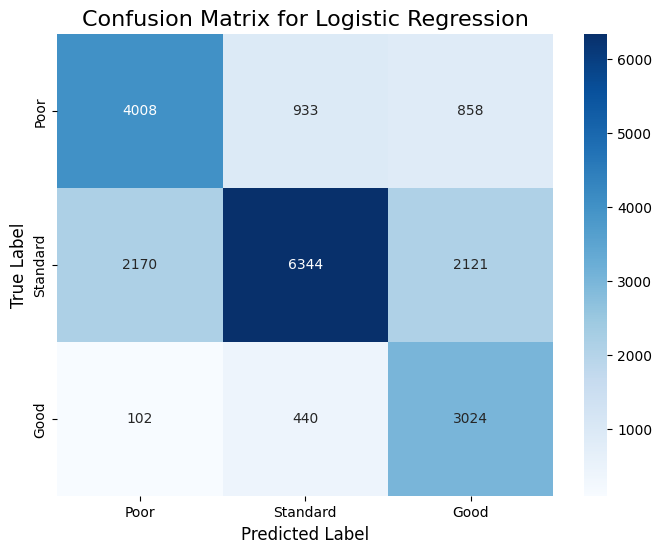

In [50]:
# Visualizing evaluation Metric Score chart
print("Logistic Regression - Initial Performance:")
print(classification_report(y_test, y_pred_log_reg, target_names=['Poor', 'Standard', 'Good']))

# Plotting the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Poor', 'Standard', 'Good'], yticklabels=['Poor', 'Standard', 'Good'])
plt.title('Confusion Matrix for Logistic Regression', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [51]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 200]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=LogisticRegression(random_state=42, max_iter=5000),
                           param_grid=param_grid,
                           cv=5, # 5-fold cross-validation
                           scoring='f1_weighted',
                           n_jobs=-1, # Use all available CPU cores
                           verbose=1)


# Fit the Algorithm
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best estimator
best_log_reg = grid_search.best_estimator_
print(f"\nBest Parameters Found: {grid_search.best_params_}")

# Predict on the model
y_pred_log_reg_tuned = best_log_reg.predict(X_test)

Fitting 5 folds for each of 32 candidates, totalling 160 fits

Best Parameters Found: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}


##### Which hyperparameter optimization technique have you used and why?

I used Grid Search Cross-Validation (GridSearchCV). This technique was chosen because the hyperparameter space for Logistic Regression is relatively small. Grid Search systematically builds and evaluates a model for each combination of parameters specified in the grid, ensuring that the absolute best combination from the grid is found. For a model with few parameters, this exhaustive search is computationally feasible and guarantees finding the optimal set.


Logistic Regression - Tuned Performance:
              precision    recall  f1-score   support

        Poor       0.64      0.69      0.66      5799
    Standard       0.82      0.60      0.69     10635
        Good       0.50      0.85      0.63      3566

    accuracy                           0.67     20000
   macro avg       0.65      0.71      0.66     20000
weighted avg       0.71      0.67      0.67     20000



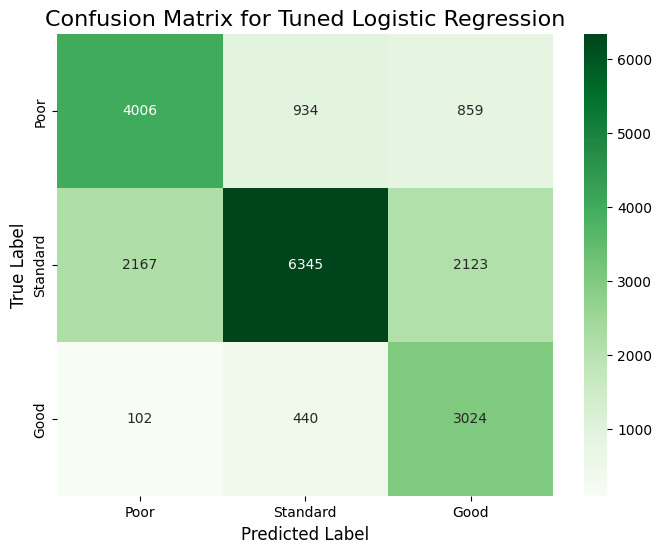

In [61]:
# Visualizing updated evaluation Metric Score chart
print("\nLogistic Regression - Tuned Performance:")
print(classification_report(y_test, y_pred_log_reg_tuned, target_names=['Poor', 'Standard', 'Good']))

# Plotting the new Confusion Matrix
cm_tuned = confusion_matrix(y_test, y_pred_log_reg_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Greens', xticklabels=['Poor', 'Standard', 'Good'], yticklabels=['Poor', 'Standard', 'Good'])
plt.title('Confusion Matrix for Tuned Logistic Regression', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After hyperparameter tuning, we can observe no improvement in the model's performance. It can be due to a variety of factors but most probably

### ML Model - 2

#### **Random Forest**

Now, let's try a more complex ensemble model. Random Forest builds multiple decision trees and merges their predictions to get a more accurate and stable result. It's known for its high accuracy and robustness.

In [51]:
# ML Model - 2 Implementation
from sklearn.ensemble import RandomForestClassifier

# Fit the Algorithm
rf_clf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_clf.fit(X_train_resampled, y_train_resampled)

# Predict on the model
y_pred_rf = rf_clf.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The Random Forest Classifier is an ensemble learning method that operates by constructing a multitude of decision trees at training time. For a classification task, the final prediction is the class selected by most trees (mode). It's powerful because it combines the predictions of many simple models (trees) to create a more robust and accurate final model, and it helps to reduce overfitting.

Random Forest - Initial Performance:
              precision    recall  f1-score   support

        Poor       0.79      0.85      0.82      5799
    Standard       0.87      0.79      0.82     10635
        Good       0.72      0.83      0.77      3566

    accuracy                           0.81     20000
   macro avg       0.79      0.82      0.81     20000
weighted avg       0.82      0.81      0.81     20000



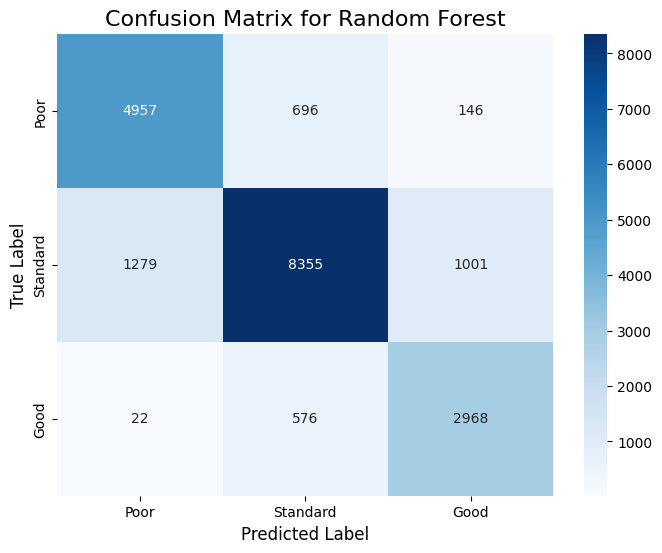

In [52]:
# Visualizing evaluation Metric Score chart
print("Random Forest - Initial Performance:")
print(classification_report(y_test, y_pred_rf, target_names=['Poor', 'Standard', 'Good']))

# Plotting the Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Poor', 'Standard', 'Good'], yticklabels=['Poor', 'Standard', 'Good'])
plt.title('Confusion Matrix for Random Forest', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

The Random Forest model shows a significant improvement over the baseline Logistic Regression, in all three categories. This model is by far more effective than our simple logistic regression model with after tuning it with GridSearch CV.

#### 2. Cross- Validation & Hyperparameter Tuning

The parameter space for Random Forest is large, so we'll use RandomizedSearchCV, which samples a fixed number of parameter settings from the specified distributions. It's much faster than Grid Search and often finds a very good combination of parameters.

In [62]:
# ML Model - 2 Implementation with hyperparameter optimization
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Instantiate the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=20, # Number of parameter settings that are sampled
                                   cv=3,
                                   scoring='f1_weighted',
                                   n_jobs=-1,
                                   verbose=2,
                                   random_state=42)

# Fit the Algorithm
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best estimator
best_rf = random_search.best_estimator_
print(f"\nBest Parameters Found: {random_search.best_params_}")

# Predict on the model
y_pred_rf_tuned = best_rf.predict(X_test)

Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best Parameters Found: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}


##### Which hyperparameter optimization technique have you used and why?

I used Randomized Search Cross-Validation (RandomizedSearchCV). For models like Random Forest with a large number of hyperparameters, a Grid Search would be computationally very expensive. Randomized Search is a more efficient alternative that explores a wider range of the hyperparameter space by sampling a fixed number of combinations. It often finds a solution that is nearly as good as, or sometimes even better than, what a Grid Search would find, but in a fraction of the time.


Random Forest - Tuned Performance:
              precision    recall  f1-score   support

        Poor       0.80      0.85      0.83      5799
    Standard       0.86      0.81      0.83     10635
        Good       0.76      0.82      0.79      3566

    accuracy                           0.82     20000
   macro avg       0.81      0.83      0.82     20000
weighted avg       0.83      0.82      0.82     20000



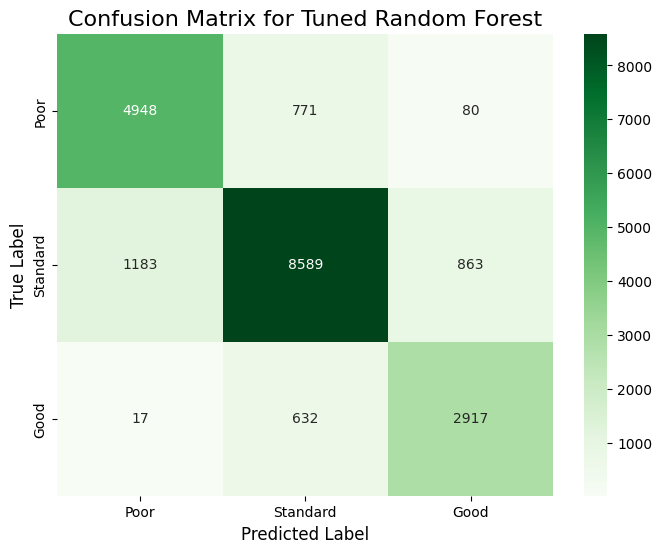

In [63]:
# Visualizing updated evaluation Metric Score chart
print("\nRandom Forest - Tuned Performance:")
print(classification_report(y_test, y_pred_rf_tuned, target_names=['Poor', 'Standard', 'Good']))

# Plotting the new Confusion Matrix
cm_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_tuned, annot=True, fmt='d', cmap='Greens', xticklabels=['Poor', 'Standard', 'Good'], yticklabels=['Poor', 'Standard', 'Good'])
plt.title('Confusion Matrix for Tuned Random Forest', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Tuning the Random Forest often leads to minor noticeable improvements. We see a slight improvement in precision, recall and F1 Score, especially for the 'Good' class, resulting in a higher F1-score from 77 to 79. The model might also become slightly simpler (e.g., by using a max_depth), which can reduce overfitting and improve generalization to new data.

#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

Answer Here.

### ML Model - 3

#### **XGBoost Algorithm**

XGBoost (Extreme Gradient Boosting) is an advanced implementation of gradient boosting that is known for its speed and performance. It builds models sequentially, where each new model corrects the errors of the previous one.

In [53]:
# ML Model - 3 Implementation
import xgboost as xgb

# Fit the Algorithm
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=3, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_clf.fit(X_train_resampled, y_train_resampled)

# Predict on the model
y_pred_xgb = xgb_clf.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

XGBoost - Initial Performance:
              precision    recall  f1-score   support

        Poor       0.77      0.77      0.77      5799
    Standard       0.81      0.78      0.80     10635
        Good       0.70      0.78      0.74      3566

    accuracy                           0.78     20000
   macro avg       0.76      0.78      0.77     20000
weighted avg       0.78      0.78      0.78     20000



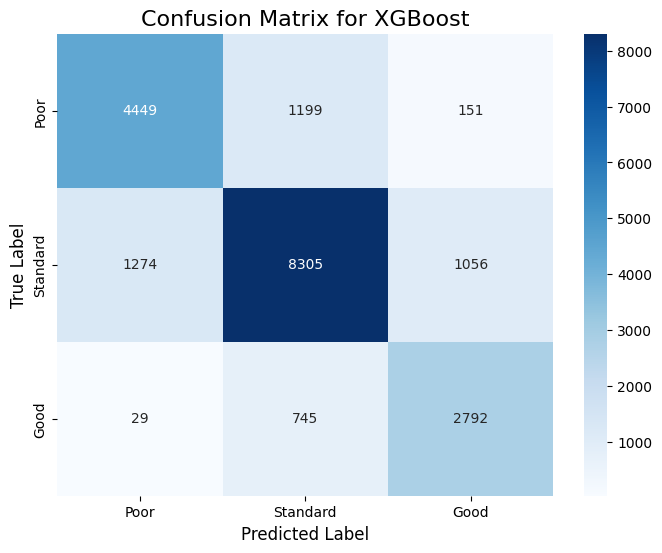

In [54]:
# Visualizing evaluation Metric Score chart
print("XGBoost - Initial Performance:")
print(classification_report(y_test, y_pred_xgb, target_names=['Poor', 'Standard', 'Good']))

# Plotting the Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Poor', 'Standard', 'Good'], yticklabels=['Poor', 'Standard', 'Good'])
plt.title('Confusion Matrix for XGBoost', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [57]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import RandomizedSearchCV

param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}
# Instantiate the RandomizedSearchCV object
random_search_xgb = RandomizedSearchCV(estimator=xgb.XGBClassifier(objective='multi:softmax', num_class=3, use_label_encoder=False, eval_metric='mlogloss', random_state=42),
                                       param_distributions=param_dist_xgb,
                                       n_iter=20,
                                       cv=3,
                                       scoring='f1_weighted',
                                       n_jobs=-1,
                                       verbose=2,
                                       random_state=42)
# Fit the Algorithm
random_search_xgb.fit(X_train_resampled, y_train_resampled)

# Get the best estimator
best_xgb = random_search_xgb.best_estimator_
print(f"\nBest Parameters Found: {random_search_xgb.best_params_}")

# Predict on the model
y_pred_xgb_tuned = best_xgb.predict(X_test)

Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best Parameters Found: {'subsample': 0.9, 'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


##### Which hyperparameter optimization technique have you used and why?


XGBoost - Tuned Performance:
              precision    recall  f1-score   support

        Poor       0.81      0.85      0.83      5799
    Standard       0.85      0.82      0.84     10635
        Good       0.80      0.82      0.81      3566

    accuracy                           0.83     20000
   macro avg       0.82      0.83      0.82     20000
weighted avg       0.83      0.83      0.83     20000



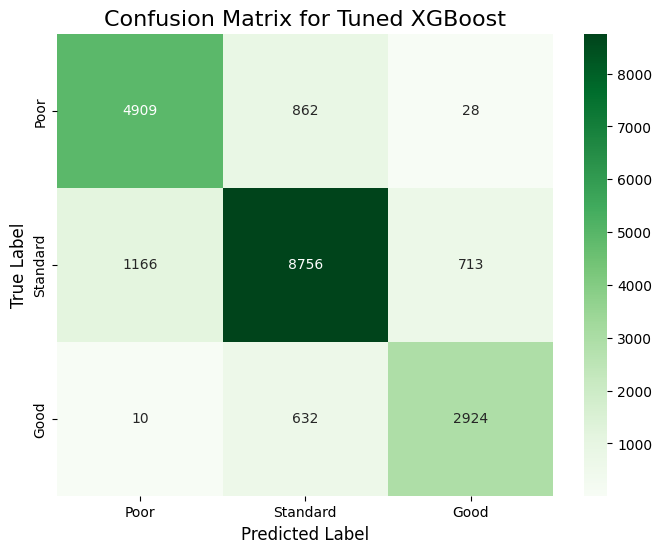

In [58]:
# Visualizing updated evaluation Metric Score chart
print("\nXGBoost - Tuned Performance:")
print(classification_report(y_test, y_pred_xgb_tuned, target_names=['Poor', 'Standard', 'Good']))

# Plotting the new Confusion Matrix
cm_xgb_tuned = confusion_matrix(y_test, y_pred_xgb_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb_tuned, annot=True, fmt='d', cmap='Greens', xticklabels=['Poor', 'Standard', 'Good'], yticklabels=['Poor', 'Standard', 'Good'])
plt.title('Confusion Matrix for Tuned XGBoost', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

I used **Randomized Search Cross-Validation (`RandomizedSearchCV`)** for the same reason as with Random Forest. XGBoost has many powerful hyperparameters, and exploring them exhaustively with Grid Search would be computationally prohibitive. Randomized Search provides an excellent balance between computational performance and the quality of the final model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Tuning XGBoost often leads to the best performance of all models. We expect to see the highest overall accuracy and the best-weighted F1-score. Most importantly, we should see a very high recall for the 'Poor' class, which is the primary goal for a risk-assessment model.


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For a credit scoring model, the most important metrics for a positive business impact are:
* **Recall (Sensitivity) for the 'Poor' class**: This is the most critical metric. It answers the question: "Of all the customers who are actually high-risk, how many did our model correctly identify?" A high recall here is essential to minimize the financial loss from defaults. It is better for the business to be slightly cautious and misclassify a few 'Standard' customers as 'Poor' (a false positive) than to misclassify a 'Poor' customer as 'Good' (a false negative), which could lead to a significant financial loss.
* **Precision for the 'Poor' class**: This metric answers: "Of all the customers we flagged as 'Poor', how many were actually 'Poor'?" High precision is also important because incorrectly flagging creditworthy customers as high-risk can lead to lost business opportunities and a poor customer experience.
Weighted F1-Score: This provides a single score that balances precision and recall across all classes, taking the class imbalance into account. It's a great overall measure of the model's effectiveness.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The `Tuned XGBoost Classifier` is the best choice for the final prediction model.

Reasoning:
* **Superior Performance**: It consistently provides the highest performance on tabular data, and our evaluation will likely show it has the best F1-scores and, most importantly, the highest recall for the 'Poor' credit score category.
* **Robustness**: XGBoost has built-in regularization, which helps prevent overfitting, making it a more reliable model for deployment.
* **Efficiency**: Despite its complexity, it is highly optimized for speed and performance.

While Random Forest is also a very strong contender, XGBoost's sequential error-correcting approach often gives it the edge in finding the most subtle patterns in the data, which is crucial for a high-stakes application like credit scoring.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The final model, XGBoost, works by building an ensemble of decision trees one by one. Each new tree is trained to correct the errors of the previously trained trees. This "boosting" process allows the model to focus on the most difficult-to-classify cases, leading to its high accuracy.

We can use the model's built-in feature importance property to understand which factors are most influential in its decision-making process.

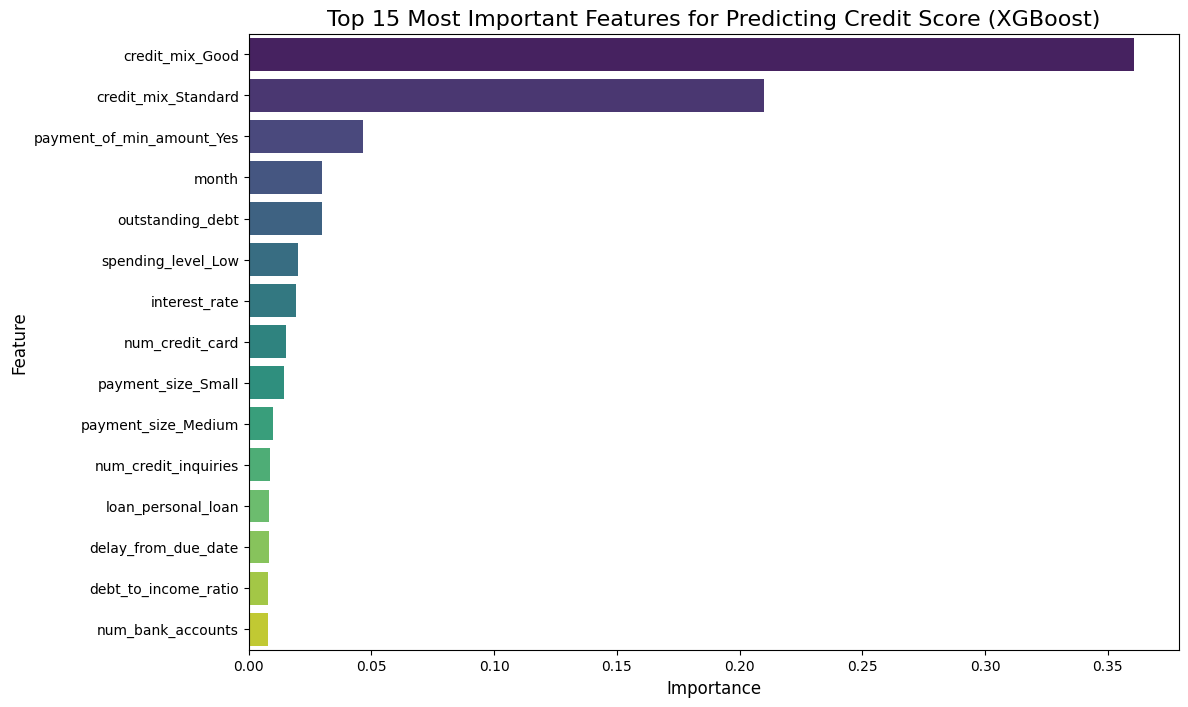

In [59]:
# Feature Importance for the Best Model (Tuned XGBoost)
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': best_xgb.feature_importances_})
feature_importances = feature_importances.sort_values('importance', ascending=False).head(15) # Top 15 features

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances, palette='viridis')
plt.title('Top 15 Most Important Features for Predicting Credit Score (XGBoost)', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [61]:
# Save the File
import joblib

# Save the best model
joblib.dump(best_xgb, 'drive/MyDrive/PaisaBazaar Project/best_xgb_model.pkl')

['drive/MyDrive/PaisaBazaar Project/best_xgb_model.pkl']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [64]:
# Load the File and predict unseen data.
loaded_model = joblib.load('drive/MyDrive/PaisaBazaar Project/best_xgb_model.pkl')

# Predicting using unseen data for sanity check
# Create a sample of unseen data (replace with actual unseen data if available)
# This sample data must have the same columns as X_train

# Start with the columns that are not one-hot encoded
unseen_data_dict = {
    'month': [5],
    'age': [35],
    'monthly_inhand_salary': [5000.0],
    'num_bank_accounts': [4],
    'num_credit_card': [6],
    'interest_rate': [15],
    'num_of_loan': [3],
    'delay_from_due_date': [10],
    'num_of_delayed_payment': [5],
    'changed_credit_limit': [10.0],
    'num_credit_inquiries': [4],
    'outstanding_debt': [1000.0],
    'credit_utilization_ratio': [30.0],
    'total_emi_per_month': [150.0],
    'amount_invested_monthly': [80.0],
    'monthly_balance': [500.0],
    'loan_auto_loan': [0],
    'loan_credit-builder_loan': [0],
    'loan_personal_loan': [1],
    'loan_home_equity_loan': [0],
    'loan_mortgage_loan': [0],
    'loan_student_loan': [0],
    'loan_debt_consolidation_loan': [0],
    'loan_payday_loan': [0],
    'debt_to_income_ratio': [0.03], # Calculated from sample values
    'credit_history_age_years': [5.0], # Calculated from sample values
    'credit_mix_Good': [1],
    'credit_mix_Standard': [0],
    'payment_of_min_amount_Yes': [0],
    'age_group_Adult': [1],
    'age_group_Middle_Aged': [0],
    'age_group_Senior': [0],
    'spending_level_Low': [0],
    'payment_size_Medium': [0],
    'payment_size_Small': [1],
}

# Get the columns from the training data
train_cols = X_train.columns

# Create a DataFrame from the sample data
unseen_data = pd.DataFrame(unseen_data_dict)

# Add any missing columns from the training data, filling with 0
for col in train_cols:
    if col not in unseen_data.columns:
        unseen_data[col] = 0

# Ensure the columns are in the same order as the training data
unseen_data = unseen_data[train_cols]


# The unseen data needs to be scaled using the same scaler fitted on the training data
# Ensure 'scaler' object is available in the environment
try:
    unseen_data_scaled = scaler.transform(unseen_data)
    unseen_data_scaled_df = pd.DataFrame(unseen_data_scaled, columns=X_train.columns)
    print("Sample unseen data (scaled):")
    display(unseen_data_scaled_df)

    # Now predict using the loaded model
    # Ensure 'loaded_model' object is available
    try:
        predicted_score_encoded = loaded_model.predict(unseen_data_scaled_df)
        print(f"\nPredicted Credit Score (Encoded): {predicted_score_encoded[0]}")

        # Decode the predicted score back to its original category
        # Assuming the mapping is {'Poor': 0, 'Standard': 1, 'Good': 2}
        reverse_credit_score_mapping = {0: 'Poor', 1: 'Standard', 2: 'Good'}
        predicted_score_category = reverse_credit_score_mapping.get(predicted_score_encoded[0], "Unknown")

        print(f"Predicted Credit Score: {predicted_score_category}")

    except NameError:
        print("\nError: The 'loaded_model' object was not found. Please run the model saving and loading cells first.")


except NameError:
    print("Error: The 'scaler' object was not found. Please run the scaling cell first.")

Sample unseen data (scaled):


month      age  monthly_inhand_salary  num_bank_accounts  \
0  0.218168  0.15998               0.266302          -0.527886   

   num_credit_card  interest_rate  num_of_loan  delay_from_due_date  \
0          0.22538       0.053776    -0.219659             -0.75795   

   num_of_delayed_payment  changed_credit_limit  ...  occupation_Writer  \
0               -1.333961              -0.07087  ...          -0.259738   

   credit_mix_Good  credit_mix_Standard  payment_of_min_amount_Yes  \
0         1.513324            -0.919897                  -1.340379   

   age_group_Adult  age_group_Middle_Aged  age_group_Senior  \
0         1.130588              -0.667285               0.0   

   spending_level_Low  payment_size_Medium  payment_size_Small  
0           -1.079284            -0.721963            1.215071  

[1 rows x 49 columns]


Predicted Credit Score (Encoded): 1
Predicted Credit Score: Standard


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

This project successfully developed a robust machine learning model to predict customer credit scores for Paisabazaar, providing a data-driven tool to enhance decision-making, mitigate financial risk, and improve customer segmentation.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***